# Used vehicles dataset EDA
~ Javier Requena

https://github.com/Javier-Requena

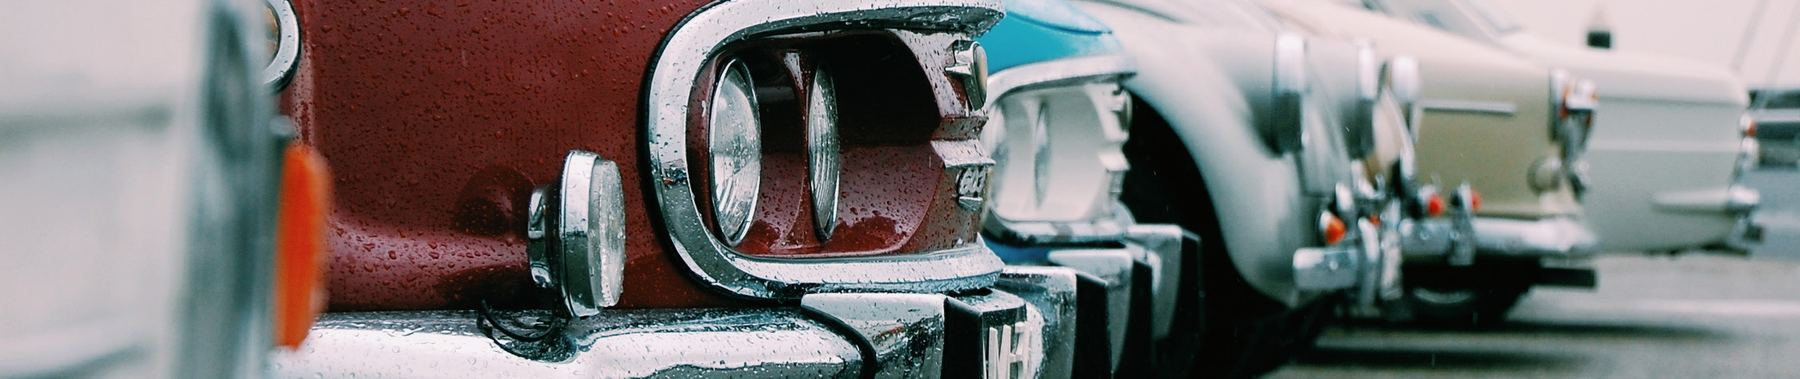

In this notebook, we are going to proceed with an exploratory data analysis (EDA) using the Used Cars Dataset from Kaggle (vehicles.csv): https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data


Throughout this notebook, we will perform the following tasks:
1. A first look at the data format and the information they contain at first glance.
2. Relevant data cleaning: incorrectly entered data, outliers, and even extreme values.
3. We will also formulate certain hypotheses about the data, which we will try to confirm or refute through data analysis and the analysis of their relationships.
4. Create a general business strategy for a car rental company simulating ownership of all the cars in the dataset.

## First look of data

To start, let us load the necessary packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 150 # For higher resolution figures
plt.rcParams['font.size'] = 8 # Lower size of figures font
plt.rcParams["figure.autolayout"] = True
import seaborn as sns

Let us import our working file in the appropriate format:

In [2]:
vehicles_data = pd.read_csv("vehicles.csv")

Whose structure is as follows:

In [3]:
vehicles_data.head(10)

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   
5  7222379453  https://hudsonvalley.craigslist.org/cto/d/west...   
6  7221952215  https://hudsonvalley.craigslist.org/cto/d/west...   
7  7220195662  https://hudsonvalley.craigslist.org/cto/d/poug...   
8  7209064557  https://medford.craigslist.org/cto/d/grants-pa...   
9  7219485069  https://erie.craigslist.org/cto/d/erie-2012-su...   

                   region                           region_url  price  year  \
0                prescott      https://prescott.craigslist.org   6000   NaN   
1            fayetteville         https://fayar.craigslist.org  11900   NaN   
2            florida keys          https://keys.craigslist.org  21000   NaN   
3  worcester / central MA     https://worcester.craigslist.org   1500   NaN   
4              greensboro    https://greensboro.craigslist.org   4900   NaN   
5           hudson valley  https://hudsonvalley.craigslist.org   1600   NaN   
6           hudson valley  https://hudsonvalley.craigslist.org   1000   NaN   
7           hudson valley  https://hudsonvalley.craigslist.org  15995   NaN   
8         medford-ashland       https://medford.craigslist.org   5000   NaN   
9                    erie          https://erie.craigslist.org   3000   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
1          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
2          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
3          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
4          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
5          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
6          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
7          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
8          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   
9          NaN   NaN       NaN       NaN  ...  NaN   NaN         NaN   

  image_url description county state lat long posting_date  
0       NaN         NaN    NaN    az NaN  NaN          NaN  
1       NaN         NaN    NaN    ar NaN  NaN          NaN  
2       NaN         NaN    NaN    fl NaN  NaN          NaN  
3       NaN         NaN    NaN    ma NaN  NaN          NaN  
4       NaN         NaN    NaN    nc NaN  NaN          NaN  
5       NaN         NaN    NaN    ny NaN  NaN          NaN  
6       NaN         NaN    NaN    ny NaN  NaN          NaN  
7       NaN         NaN    NaN    ny NaN  NaN          NaN  
8       NaN         NaN    NaN    or NaN  NaN          NaN  
9       NaN         NaN    NaN    pa NaN  NaN          NaN  

[10 rows x 26 columns]

In [4]:
vehicles_data.shape

(426880, 26)

In [5]:
vehicles_data.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

As we can see, the dataset consists of a substantial number of data points (426,880) across 26 different features. Let's document each of the columns in the dataframe to have the maximum information possible and extract the most relevant information:

- id — Unique ID given to every Craigslist ad and is the primary key of the dataset.
- url — URL of the car sale advertisement on the Craigslist website.
- region — City where the sale is located.
- region_url — Craigslist URL for sales in the region.
- price — Sale price (in US dollars).
- year — The year in which the car was manufactured.
- manufacturer — The manufacturer of the car, with 42 unique businesses engaged in automobile manufacturing.
- model — The exact model of the car, such as "sierra classic 2500hd."
- condition — The condition of the car, which can be "new," "like new," "excellent," "good," "fair," or "salvage."
- cylinders — The number of cylinders in the car engine, ranging from 3 to 12, with an "other" category.
- fuel — The type of fuel used, including "diesel," "gas," "electric," "hybrid," and "other."
- odometer — The total number of miles driven by the car.
- title_status — The legal status of the vehicle, which can be "clean," "lien," "rebuilt," "salvage," "parts only," or "missing."
- transmission — The type of gearbox in the vehicle, which can be "automatic," "manual," or "other."
- VIN — A unique vehicle identification number.
- drive — The type of drive axle in the vehicle, which can be "4WD" (Four-wheel drive), "FWD" (Front-wheel drive), or "RWD" (Rear-wheel drive).
- size — The size of the vehicle's body.
- type — The type of vehicle body, identifying if it's an SUV, a mini-van, or one of 13 unique values.
- paint_color — The exterior paint color of the vehicle.
- image_url — URL of the main image in the Craigslist sale advertisement.
- county — The county where the sale is located.
- state — The state, represented in a short form (e.g., "fl" for the state of Florida).
- lat — Latitude in decimal degrees where the sale is located.
- long — Longitude in decimal degrees where the sale is located.
- posting_date — Date and time of the advertisement's posting on Craigslist in the format YYYY-MM-DDTHH:MM:SS±HH:MM.

Let us examine the data types of each column:

In [6]:
vehicles_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [7]:
vehicles_data.describe()

id         price           year      odometer  county  \
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05     0.0   
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04     NaN   
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05     NaN   
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00     NaN   
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04     NaN   
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04     NaN   
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05     NaN   
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07     NaN   

                 lat           long  
count  420331.000000  420331.000000  
mean       38.493940     -94.748599  
std         5.841533      18.365462  
min       -84.122245    -159.827728  
25%        34.601900    -111.939847  
50%        39.150100     -88.432600  
75%        42.398900     -80.832039  
max        82.390818     173.885502

In [8]:
vehicles_data.describe(include="object")

url    region  \
count                                              426880    426880   
unique                                             426880       404   
top     https://prescott.craigslist.org/cto/d/prescott...  columbus   
freq                                                    1      3608   

                            region_url manufacturer   model condition  \
count                           426880       409234  421603    252776   
unique                             413           42   29667         6   
top     https://spokane.craigslist.org         ford   f-150      good   
freq                              2988        70985    8009    121456   

          cylinders    fuel title_status transmission                VIN  \
count        249202  423867       418638       424324             265838   
unique            8       5            6            3             118264   
top     6 cylinders     gas        clean    automatic  1FMJU1JT1HEA52352   
freq          94169  356209       405117       336524                261   

         drive       size    type paint_color  \
count   296313     120519  334022      296677   
unique       3          4      13          12   
top        4wd  full-size   sedan       white   
freq    131904      63465   87056       79285   

                                                image_url  \
count                                              426812   
unique                                             241899   
top     https://images.craigslist.org/00N0N_1xMPvfxRAI...   
freq                                                 7357   

                                              description   state  \
count                                              426810  426880   
unique                                             360911      51   
top     35 VEHICLES PRICED UNDER $3000!!!  BIG TIME! T...      ca   
freq                                                  231   50614   

                    posting_date  
count                     426812  
unique                    381536  
top     2021-04-23T22:13:05-0400  
freq                          12

Immediately, we can observe that within the numeric variables, we will encounter outlier issues in the **price**, **year**, and **odometer** columns. The max and min values show excessively large values for price (3.73E+09) and odometer (1E+07), and unusually low values for year (around 1900). We will need to perform outlier treatment to identify which of these values may be due to human error and can be corrected, and which should be directly discarded.

Regarding the categorical columns, some of them contain a large number of unique values and, at first glance, may provide limited information, such as url, image_url, or description. We will also need to review some anomalous values within the **VIN** category since it's unusual for a supposedly unique value like the vehicle identification number to appear repeated 261 times, as in the case of the most frequent occurrence.

In [9]:
na_percentage = vehicles_data.isna().sum() / vehicles_data.shape[0] * 100
print(na_percentage)

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64


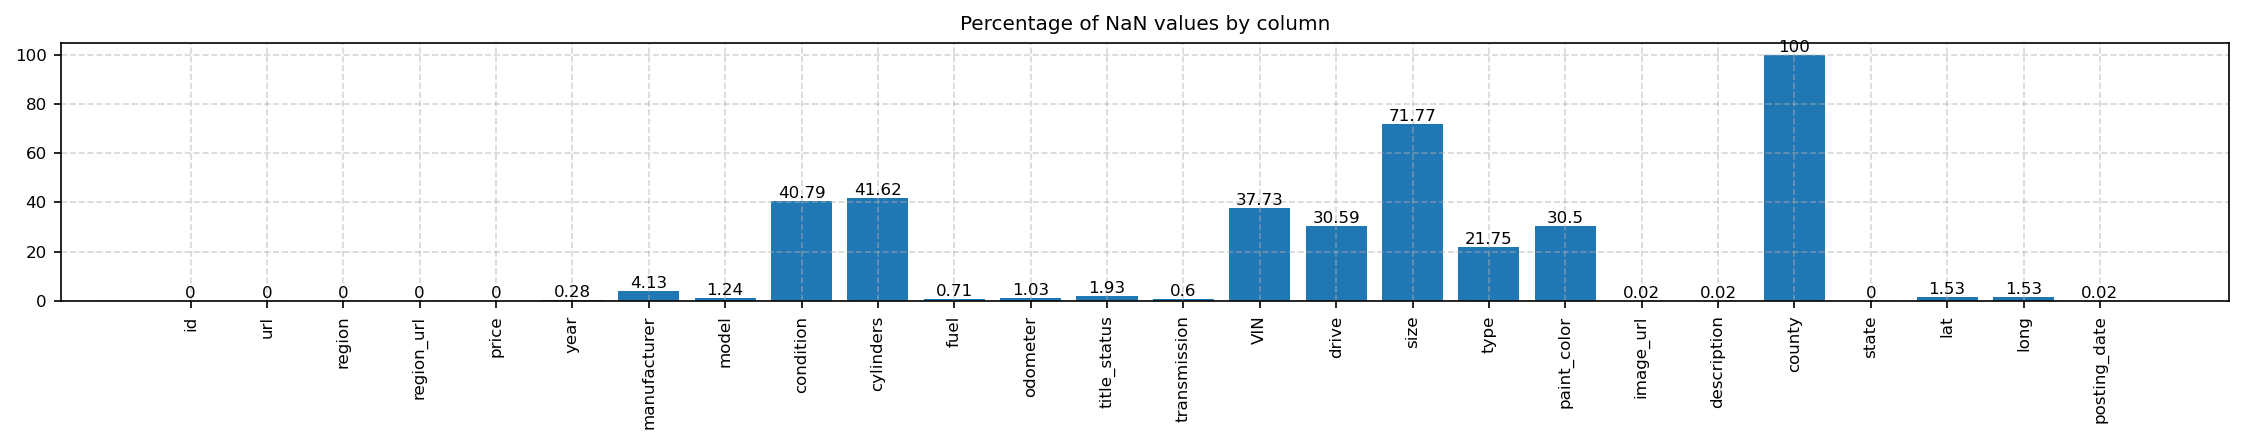

In [10]:
fig, ax = plt.subplots(figsize=[15, 3])
bars = ax.bar(x=vehicles_data.columns, height=round(na_percentage, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of NaN values by column")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

Let us proceed to directly remove the county column since it contains all null values. As for the remaining columns, we will make appropriate decisions during the data cleaning process.

In [11]:
vehicles_data.drop(columns="county", inplace=True)

As we can see, there is also a high presence of NaN (null) values in some columns. We'll need to handle these missing values before proceeding with any analysis.

Let us now examine the number of unique values in each categorical column. Naturally, we will exclude from the analysis those columns that have one hundred or more unique values:

In [12]:
num_col = list(vehicles_data.select_dtypes(include=["int64", "float64"]).columns)
cat_col = list(vehicles_data.select_dtypes(include="object").columns)

We will proceed with the visualization of the categorical columns using bar plots:

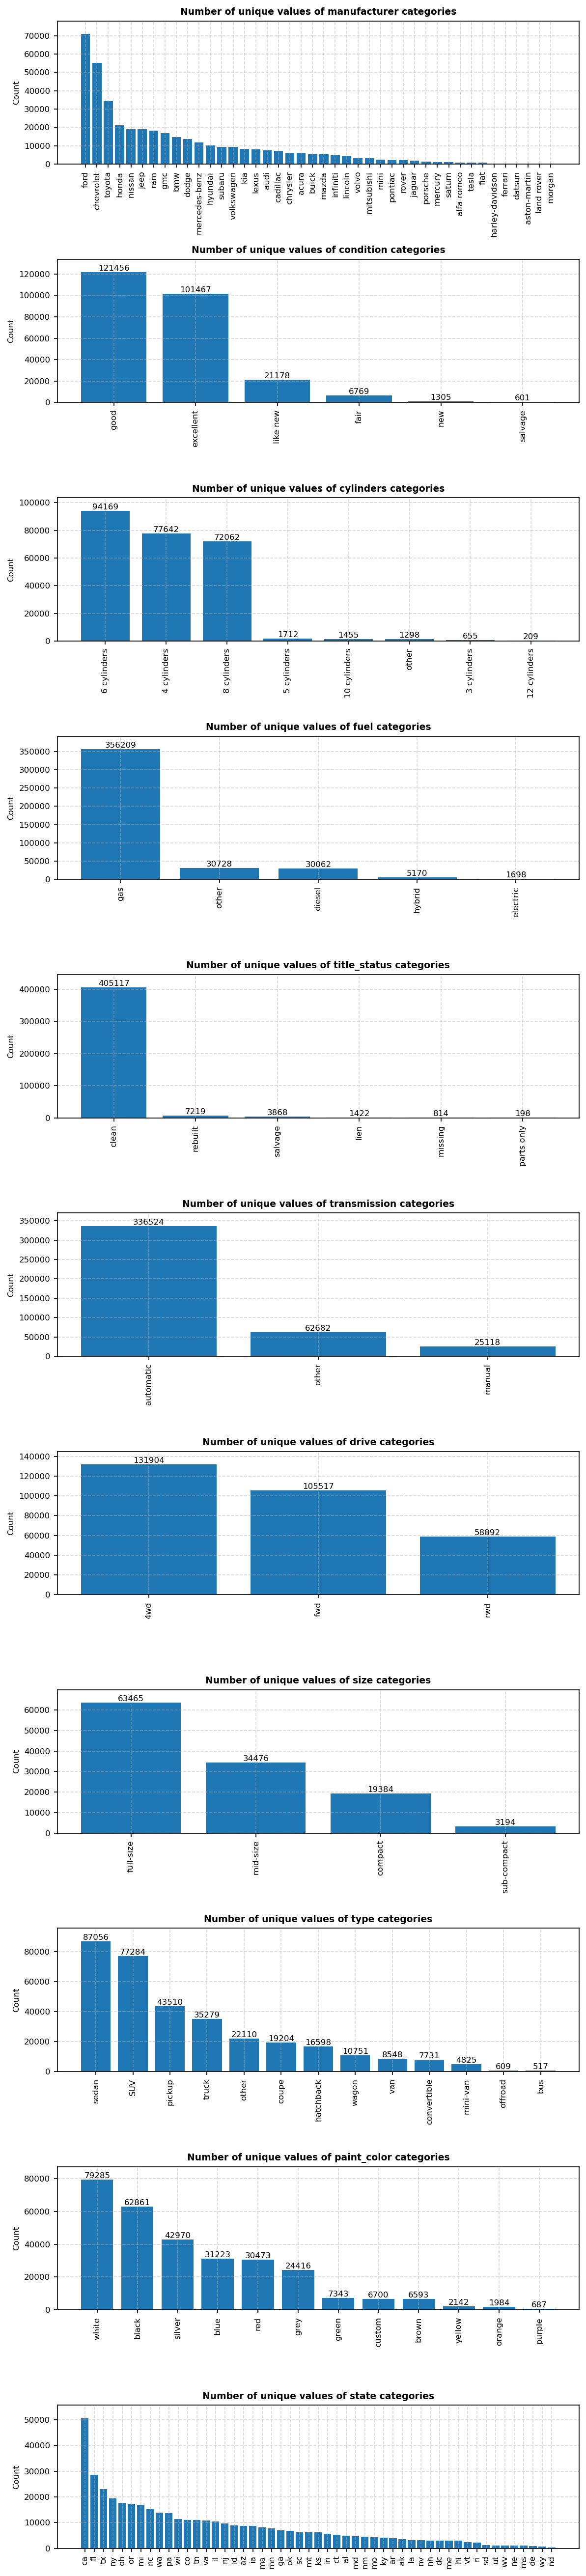

In [13]:
fig, ax = plt.subplots(11, 1, figsize=[8, 35])
index = 0
for column in cat_col:
    if vehicles_data[column].nunique() < 100:
        # Bar plot:
        bars = ax[index].bar(x=vehicles_data[column].value_counts().index,
                             height=vehicles_data[column].value_counts())
        
        if vehicles_data[column].nunique() < 15:
             # Numeric label above each bar (only if few labels)
            ax[index].bar_label(bars)

        # Rotation of axis labels for better visuals
        ax[index].tick_params(axis='x', rotation=90, labelsize= 8)
        ax[index].tick_params(axis='y', labelsize= 8)
        ax[index].set_ylabel('Count')
        
        # Set the subplot title
        ax[index].set_title(f"Number of unique values of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
        # Add a grid to the subplot
        ax[index].grid(linestyle="dashed", alpha=0.5)

        ax[index].margins(y=0.1)
        
        # Increment the subplot index
        index += 1

plt.tight_layout()
plt.show()

And to the numeric columns using histograms:

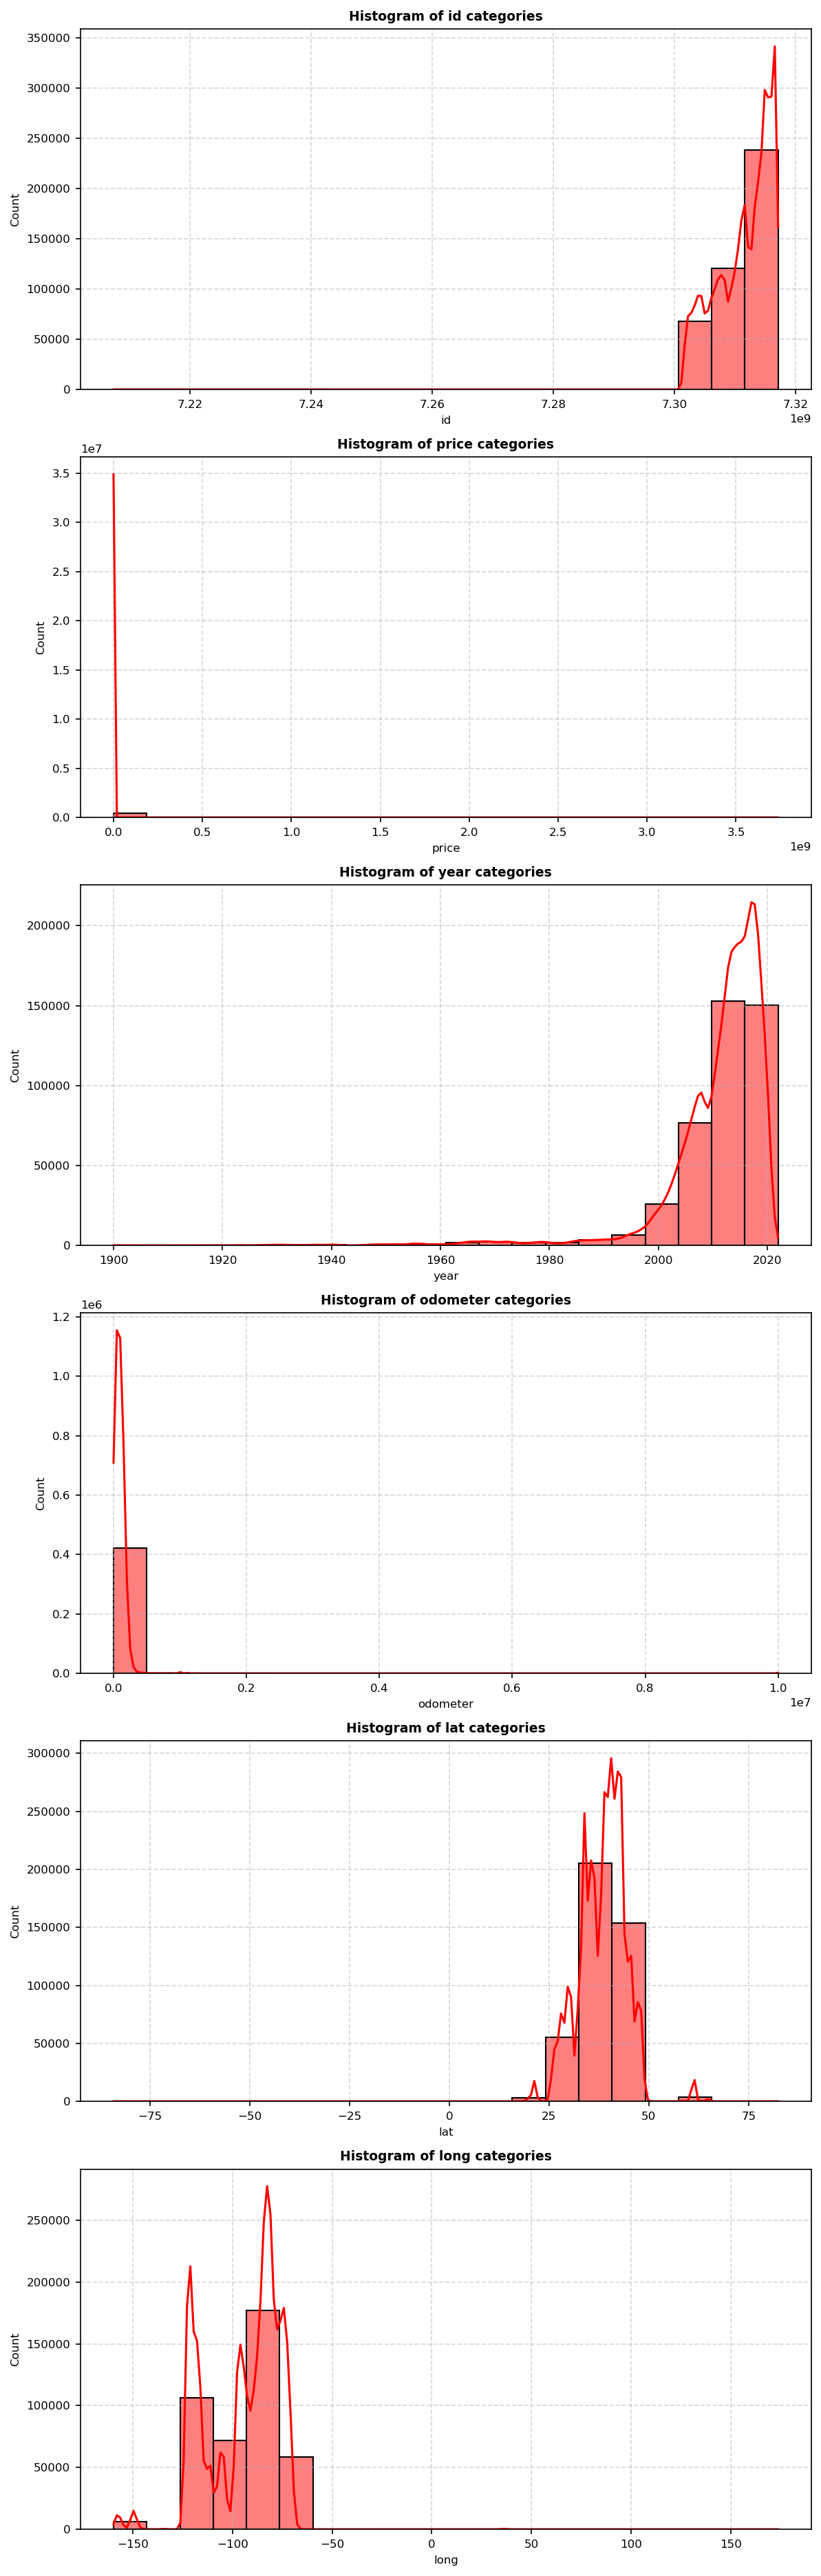

In [14]:
fig, ax = plt.subplots(6, 1, figsize=[8, 25])
index = 0
for index, column in enumerate(num_col):
    # Histplot:
    sns.histplot(ax=ax[index], x=vehicles_data[column], bins=20, kde=True, color='red')

    # Set the subplot title
    ax[index].set_title(f"Histogram of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)
    
plt.tight_layout()
plt.show()

The presence of anomalous values is noticeable in some of the figures; that is the idea behind creating them before the cleaning process, as it allows us to visualize the structure of anomalous data.

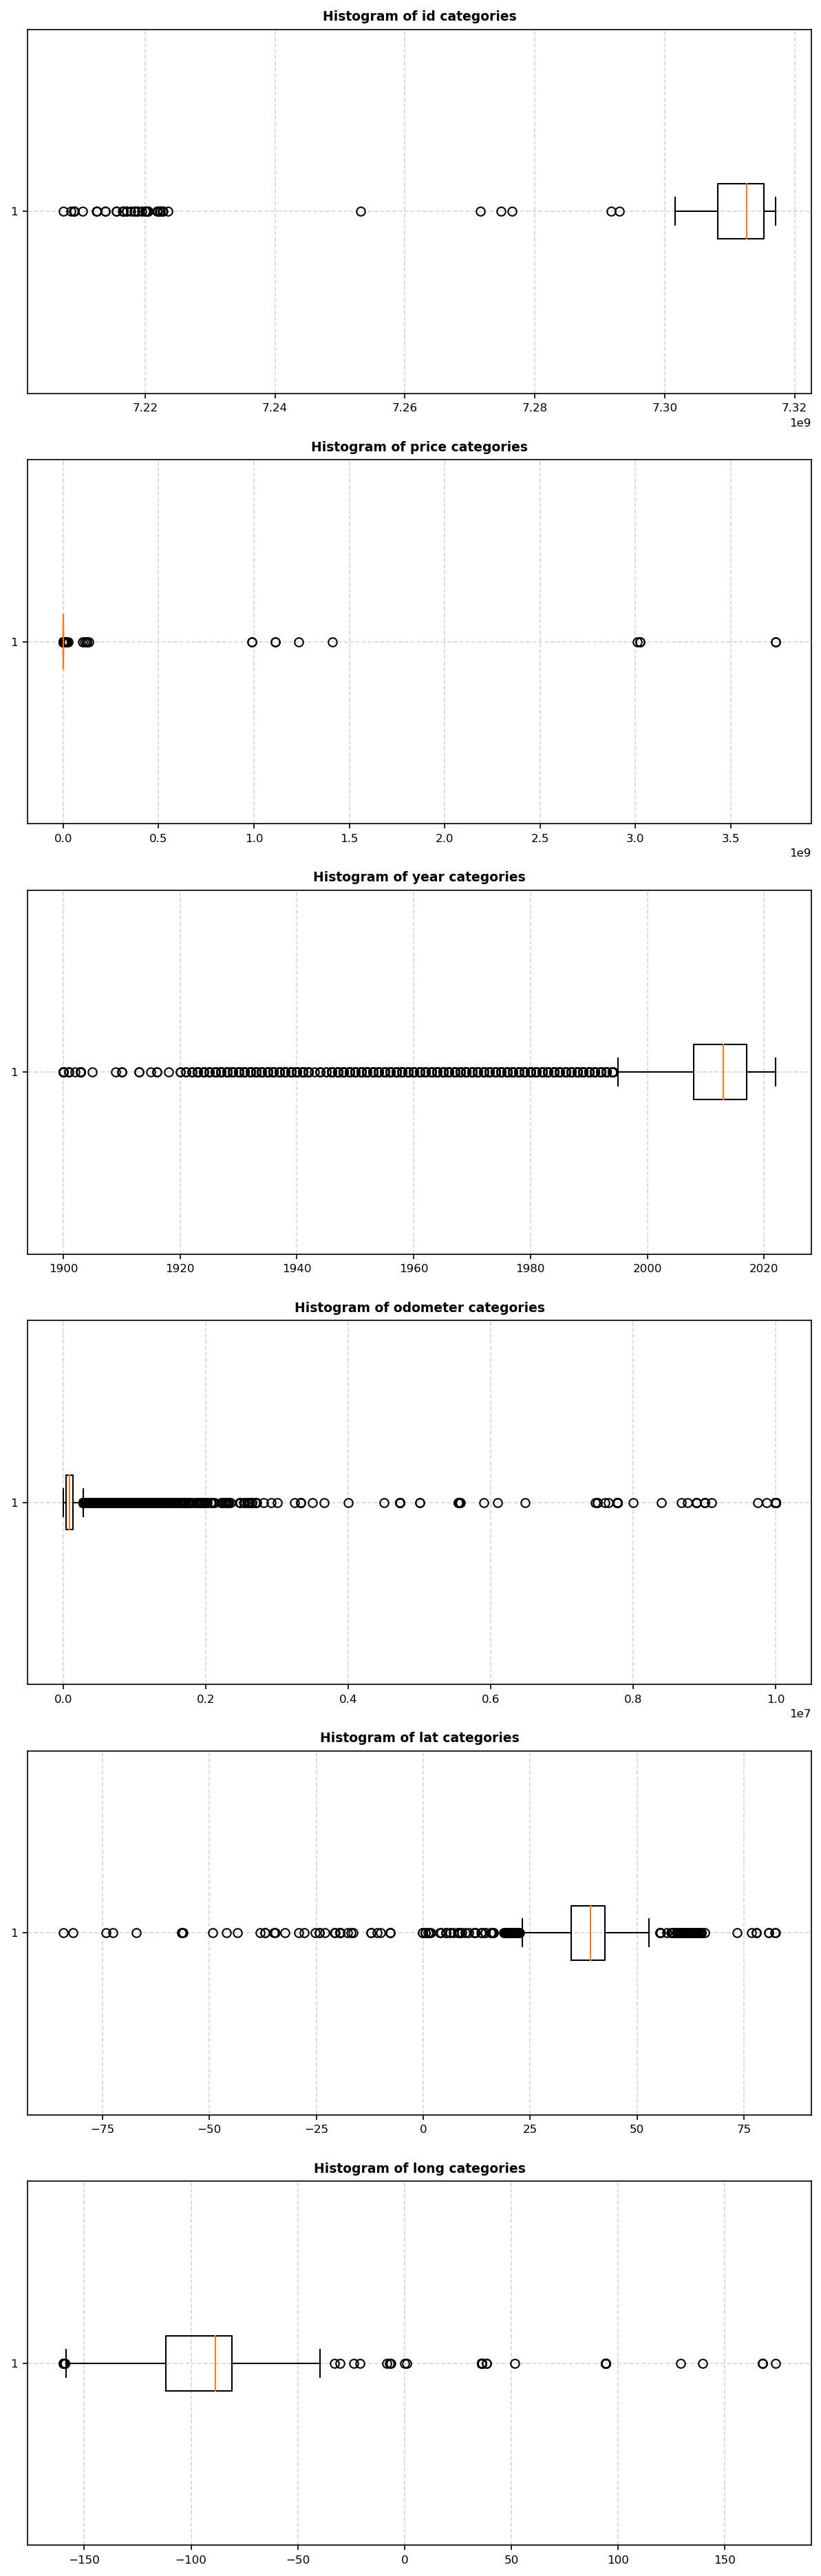

In [15]:
fig, ax = plt.subplots(6, 1, figsize=[8, 25])
index = 0
for column in num_col:
    # Histplot:
    ax[index].boxplot(vehicles_data[column].dropna(), vert=False)

    # Set the subplot title
    ax[index].set_title(f"Histogram of {column} categories", fontdict = {"fontsize": 9, "fontweight": "bold"})
        
    # Add a grid to the subplot
    ax[index].grid(linestyle="dashed", alpha=0.5)

    # Increment the subplot index
    index += 1

plt.tight_layout()
plt.show()

With these boxplots, we can also see how the outliers in our dataset are distributed.

## Data Cleansing

### General considerations:

We will save the size of the dataset to observe how it changes after the cleaning process is completed.

In [16]:
shape_before_cleaning = vehicles_data.shape
print(shape_before_cleaning)

(426880, 25)


We will proceed to directly remove the columns that, in our judgment, do not provide any relevant information:

In [17]:
vehicles_data.drop(columns=["url", "region_url", "image_url"], inplace=True)

Similarly, we will set aside the data for cars whose condition is salvage or whose legal status is not entirely clean. These cars are not suitable for a leasing model, and therefore, we will need to decide what to do with them later.

In [18]:
salvage_cars = vehicles_data[vehicles_data["condition"] == "salvage"].index
unclean_cars = vehicles_data[vehicles_data["title_status"] != "clean"].index

In [19]:
vehicles_data.drop(index=salvage_cars, axis=0, inplace=True, errors="ignore")
vehicles_data.drop(index=unclean_cars, axis=0, inplace=True, errors="ignore")

### Price

Price will be the most important variable within the dataset, as it has a direct impact on the company's profits or losses. In an ML model, this would be the target variable to predict. We will pay special attention to the treatment of errors and outliers in this variable. Additionally, we will be quite stringent because we cannot allow economic calculations to be disrupted by incorrect prices.

As we have observed, we have extremely skewed data points due to the improper actions of users:

In [20]:
vehicles_data[vehicles_data["price"]>1E6].head(10)

id           region       price    year   manufacturer  \
280     7315849335       birmingham   987654321  1960.0      chevrolet   
1838    7315961634           dothan    99999999  1993.0           ford   
26075   7314964461  fresno / madera     1111111  2014.0      chevrolet   
29386   7305265540  humboldt county  1111111111  1999.0           ford   
37409   7314053169          modesto  1111111111  2020.0           jeep   
37410   7314052904          modesto  3009548743  2021.0      chevrolet   
68935   7302895209   ventura county     2000000  2002.0         saturn   
91576   7309730903         delaware  3024942282  2000.0  mercedes-benz   
105843  7314124996          orlando     6995495  2014.0          dodge   
122470  7315836487          atlanta   987654321  1960.0      chevrolet   

                          model condition    cylinders    fuel   odometer  \
280                         NaN       NaN          NaN     gas   999999.0   
1838                     ranger       NaN          NaN     gas    99999.0   
26075                       NaN       NaN          NaN   other       11.0   
29386    f350 super duty lariat      good  8 cylinders  diesel   149000.0   
37409                       NaN       NaN          NaN     gas     1000.0   
37410                       NaN       NaN  8 cylinders     gas     1000.0   
68935   l-series l200 4dr sedan      good  4 cylinders     gas   164290.0   
91576                 benz e320       NaN          NaN     gas   100000.0   
105843                  journey       NaN  4 cylinders     gas   135888.0   
122470                      NaN       NaN          NaN     gas  9999999.0   

        ...                VIN drive       size    type paint_color  \
280     ...                NaN   NaN        NaN     NaN         NaN   
1838    ...                NaN   NaN        NaN     NaN         NaN   
26075   ...                NaN   NaN        NaN     NaN         NaN   
29386   ...                NaN   rwd  full-size  pickup       white   
37409   ...                NaN   4wd        NaN     NaN         NaN   
37410   ...                NaN   4wd        NaN     NaN         NaN   
68935   ...                NaN   fwd   mid-size   sedan       green   
91576   ...                NaN   NaN        NaN     NaN         NaN   
105843  ...  3C4PDCAB5ET204162   fwd        NaN     SUV         NaN   
122470  ...                NaN   NaN        NaN     NaN         NaN   

                                              description state        lat  \
280     (TRADE VALUE IS HIGHER )I have a 1960 Impala h...    al  33.633900   
1838    1993 Ford Ranger, extended cab, 3.0 liter,  ne...    al  31.053493   
26075   WE WILL COME TO YOU OR YOU CAN COME TO US, CHE...    ca  37.674600   
29386   Thank you to everyone that contacted me concer...    ca  40.946500   
37409   WE WILL BUY YOUR TRUCK & JEEP  & HARLEY DAVIDS...    ca  37.640900   
37410   WE WILL BUY YOUR TRUCK & JEEP  & HARLEY DAVIDS...    ca  37.640900   
68935   No longer need runs and drives great.  This ca...    ca  34.236498   
91576   Any year,any condition ! Text Jason 3024942282...    de  39.703511   
105843  2014 Dodge Journey SE Sport Utility 4D - $6,99...    fl  28.394900   
122470  (TRADE VALUE IS HIGHER )I have a 1960 Impala h...    ga  33.633900   

              long              posting_date  
280     -86.598100  2021-05-02T13:24:09-0500  
1838    -85.825968  2021-05-02T17:18:25-0500  
26075  -121.011300  2021-04-30T12:20:06-0700  
29386  -124.083400  2021-04-11T11:40:08-0700  
37409  -120.974900  2021-04-28T14:29:17-0700  
37410  -120.974900  2021-04-28T14:28:42-0700  
68935  -119.039074  2021-04-06T16:40:31-0700  
91576   -75.746681  2021-04-20T08:46:47-0400  
105843  -81.417900  2021-04-28T20:11:41-0400  
122470  -86.598100  2021-05-02T14:00:40-0400  

[10 rows x 22 columns]

We have values that are simply ridiculous, such as "987654321" or "1111111111," and others that likely correspond to a problem with decimal point input:

In [21]:
vehicles_data.loc[105843]

id                                                     7314124996
region                                                    orlando
price                                                     6995495
year                                                       2014.0
manufacturer                                                dodge
model                                                     journey
condition                                                     NaN
cylinders                                             4 cylinders
fuel                                                          gas
odometer                                                 135888.0
title_status                                                clean
transmission                                            automatic
VIN                                             3C4PDCAB5ET204162
drive                                                         fwd
size                                                          NaN
type      

This price, with a high probability, should be "69954.95" and not "6995495." It is possible to implement an algorithm that, based on the make, model, year, and odometer, could check for possible errors of this kind by verifying if the prices divided by 10 or 100 (depending on whether one or two decimal points are missing) correspond to prices similar to the population average of that vehicle. In this case, it may not be necessary because the number of extreme values we have is only 40, so we can safely discard these data without significantly reducing the total.

Similarly, we have almost 8% of the initial values that are either null or less than 10:

In [22]:
vehicles_data["price"].quantile(0.08)

1.0

In [23]:
vehicles_data[vehicles_data["price"]<10].head(10)

id      region  price    year   manufacturer  \
46   7315039307      auburn      0  2011.0           jeep   
126  7305672709      auburn      0  2018.0      chevrolet   
127  7305672266      auburn      0  2019.0      chevrolet   
128  7305672252      auburn      0  2018.0      chevrolet   
191  7316755272  birmingham      0  2015.0         nissan   
239  7316237340  birmingham      0  2019.0      chevrolet   
242  7316211151  birmingham      0  2014.0            NaN   
244  7316198338  birmingham      0  2017.0      chevrolet   
258  7316080522  birmingham      0  2015.0  mercedes-benz   
305  7315671284  birmingham      0  2018.0  mercedes-benz   

                     model  condition    cylinders    fuel  odometer  ...  \
46                 compass  excellent          NaN     gas   99615.0  ...   
126      express cargo van   like new  6 cylinders     gas   68472.0  ...   
127      express cargo van   like new  6 cylinders     gas   69125.0  ...   
128      express cargo van   like new  6 cylinders     gas   66555.0  ...   
191                 sentra  excellent  4 cylinders     gas   99505.0  ...   
239         silverado 1500  excellent  8 cylinders     gas   25127.0  ...   
242  Freightliner Cascadia        NaN          NaN  diesel     100.0  ...   
244   silverado 2500hd 4x4   like new  8 cylinders  diesel  102000.0  ...   
258                s-class        NaN  8 cylinders     gas   78807.0  ...   
305                e-class        NaN  4 cylinders     gas   34099.0  ...   

                   VIN drive       size   type paint_color  \
46                 NaN   NaN  full-size    SUV         NaN   
126  1GCWGAFP8J1309579   rwd  full-size    van       white   
127  1GCWGAFP4K1214373   rwd  full-size    van       white   
128  1GCWGAFPXJ1337903   rwd  full-size    van       white   
191  3N1AB7AP8FY348505   fwd        NaN  sedan      silver   
239  3GCUYGED2KG277424   4wd        NaN  truck         red   
242                NaN   NaN        NaN    NaN         NaN   
244                NaN   4wd  full-size  truck      silver   
258                NaN   4wd  full-size  sedan        grey   
305                NaN   rwd   mid-size  sedan       black   

                                           description state        lat  \
46   Call or text now 800-213-0336 Open 9:00-6:00pm...    al  32.547500   
126  2018 Chevrolet Express Cargo Van RWD 2500 135"...    al  31.425091   
127  2019 Chevrolet Express Cargo Van RWD 2500 135"...    al  31.425091   
128  2018 Chevrolet Express Cargo Van RWD 2500 135"...    al  31.425091   
191  2015 Nissan Sentra  by Benton Nissan of Oxford...    al  33.614088   
239  2019 Chevrolet Silverado 1500  by Benton Nissa...    al  33.614088   
242  HEC LEASING, LLC Call Gary, Russ or Clay at 88...    al  36.012700   
244  SELLJNG THIS AWESOME CHEVY 2500 Z71 4x4 DURAMA...    al  34.188155   
258  2015 Mercedes Benz S Class S 63 AMG AWD Design...    al        NaN   
305  2018 Mercedes Benz E Class E 300 AMG Sport Pan...    al        NaN   

          long              posting_date  
46  -85.468200  2021-04-30T16:35:11-0500  
126 -85.617723  2021-04-12T11:20:35-0500  
127 -85.617723  2021-04-12T11:20:00-0500  
128 -85.617723  2021-04-12T11:19:58-0500  
191 -85.796729  2021-05-04T11:00:42-0500  
239 -85.796729  2021-05-03T11:00:41-0500  
242 -86.560000  2021-05-03T10:19:55-0500  
244 -86.851389  2021-05-03T09:59:43-0500  
258        NaN  2021-05-03T00:22:00-0500  
305        NaN  2021-05-02T04:57:50-0500  

[10 rows x 22 columns]

These prices are logically incorrect. With more time, it would have been proposed to try to recover missing data using the sales description field, as in many cases, the price is correctly referenced in that information.

Once these two initial criteria are decided, we proceed to remove the data that do not meet them:

In [24]:
min_price = vehicles_data[vehicles_data["price"] < 10].index
max_price = vehicles_data[vehicles_data["price"] > 1000000].index

In [25]:
vehicles_data.drop(index=min_price, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=max_price, axis=0, errors="ignore", inplace=True)

Once these extreme data points are removed, we can indeed perform a more precise outlier analysis using the usual rules, such as the Interquartile Range (IQR). It's important to note that, to avoid introducing bias, we will remove outliers while considering the year of manufacture as a moving element. This is because the median and interquartile range change substantially with respect to the car's year of manufacture:

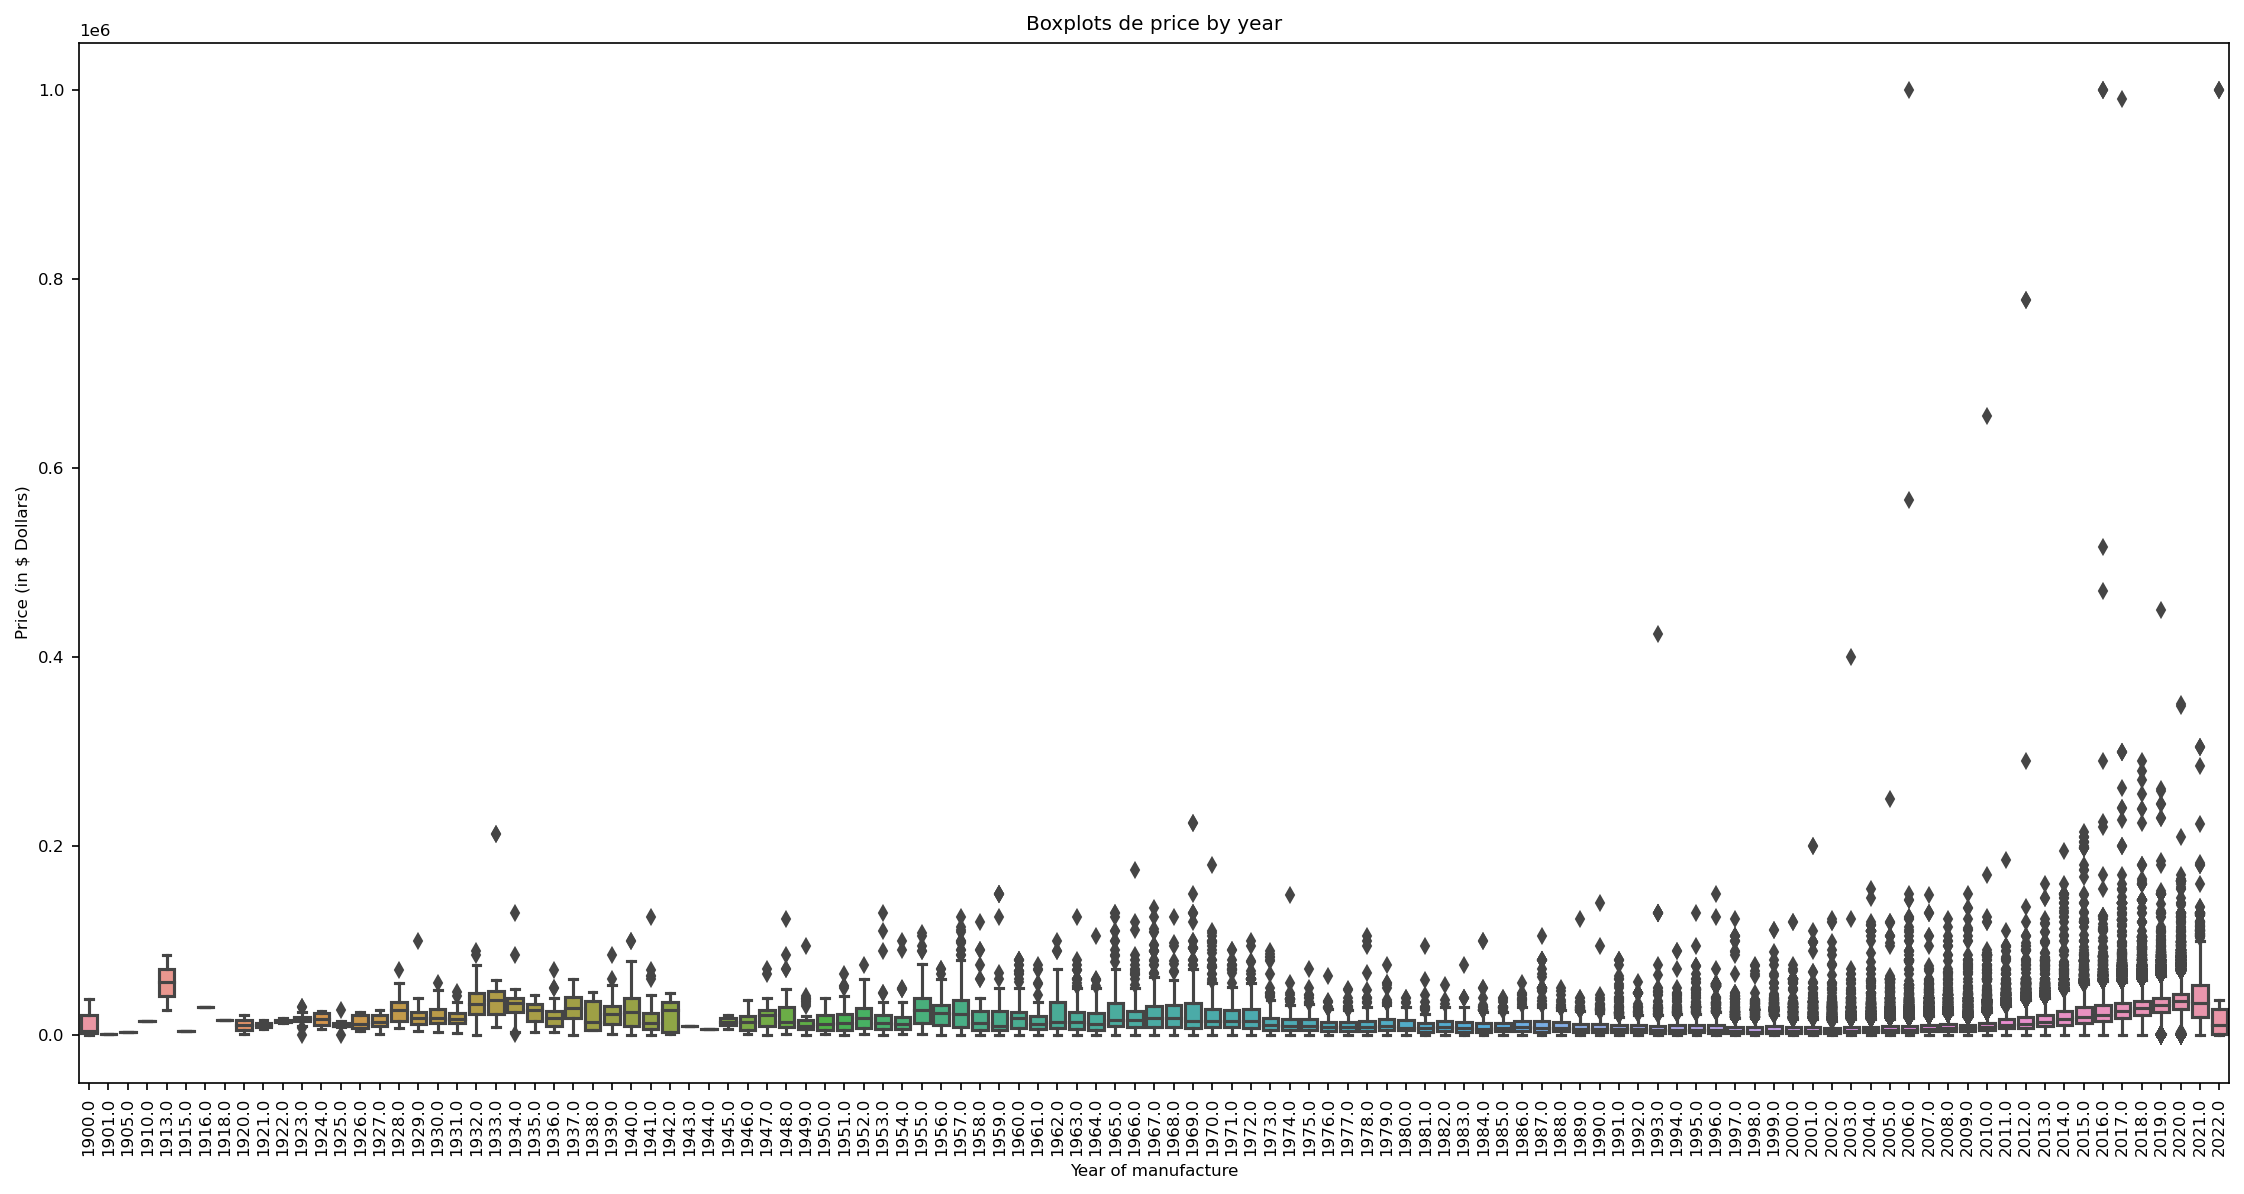

In [26]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='price', data=vehicles_data)
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots de price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Price (in $ Dollars)')
plt.show()

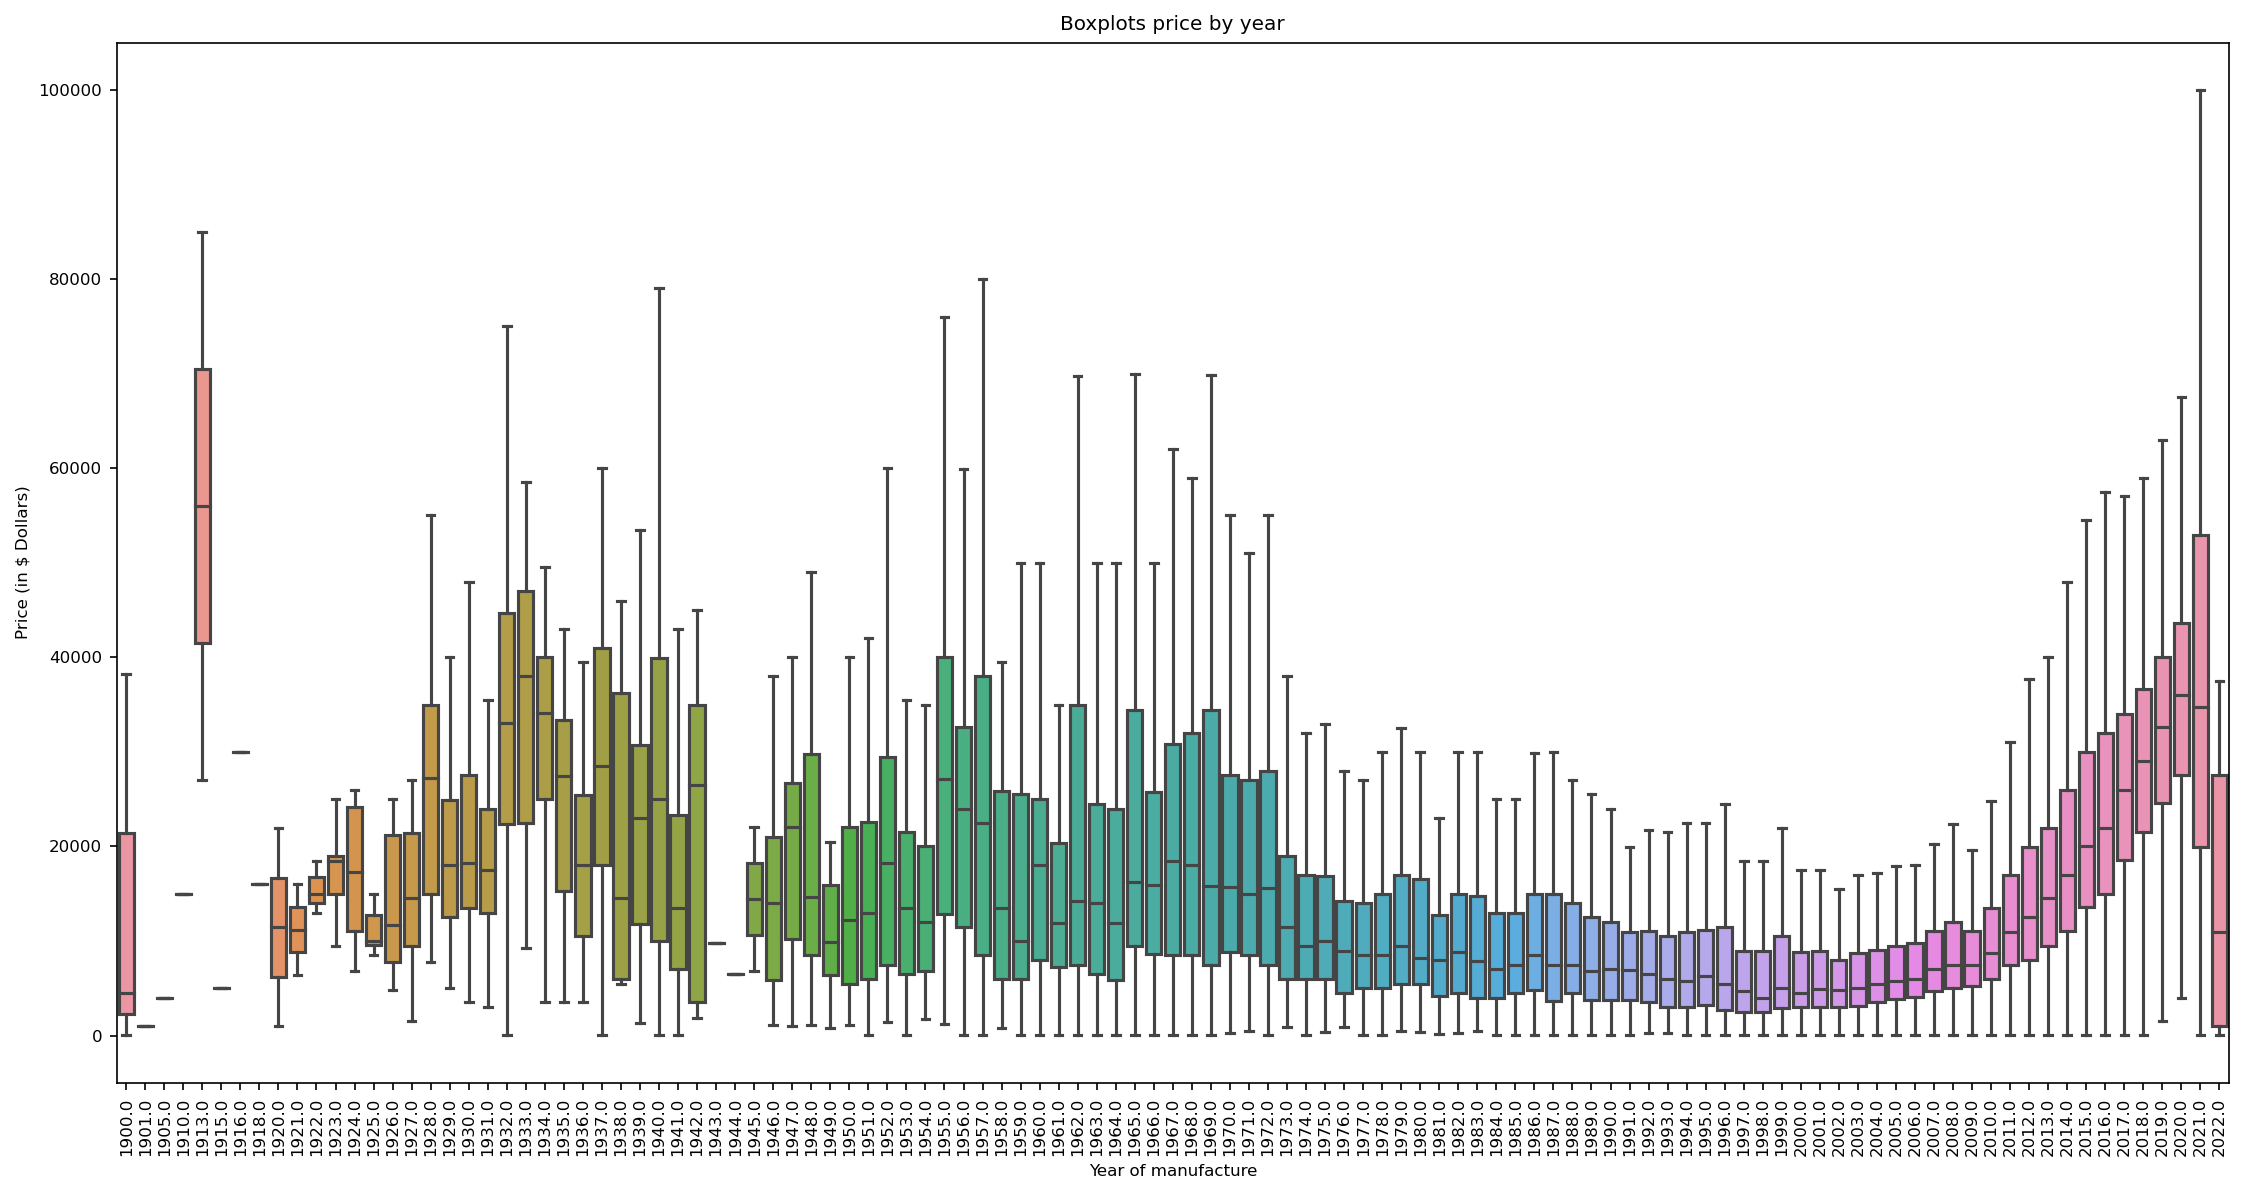

In [27]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='price', data=vehicles_data, showfliers=False)
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Price (in $ Dollars)')
plt.show()

Now, let us proceed to remove the outliers for each year:

In [28]:
for year in sorted(vehicles_data["year"].unique()):
    q1 = vehicles_data[vehicles_data["year"] == year]["price"].quantile(0.25)
    q3 = vehicles_data[vehicles_data["year"] == year]["price"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = vehicles_data[(vehicles_data["year"] == year) & (vehicles_data["price"] < lower_limit)].index
    upper_indexes = vehicles_data[(vehicles_data["year"] == year) & (vehicles_data["price"] > upper_limit)].index
    vehicles_data.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    vehicles_data.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

### Odometer

In this case, for removing outliers from the odometer column, we will do something similar to what was done with the price. First, we will eliminate extreme values (values that are excessively high or low to be realistic) that can skew the results. Therefore, we will remove all cars that have more than 300,000 miles (~482,000 km) and all cars that have fewer than 500 miles (~800 km) and are not categorized as new.

In [29]:
low_odometer = vehicles_data[(vehicles_data["odometer"] < 500) & (vehicles_data["condition"] != "new")].index
high_odometer = vehicles_data[vehicles_data["odometer"] > 300000].index

In [30]:
vehicles_data.drop(index=low_odometer, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=high_odometer, axis=0, errors="ignore", inplace=True)

After that, we will proceed to remove the outlier values again, using the Interquartile Range (IQR) criterion, but this time considering the odometer values for each year:

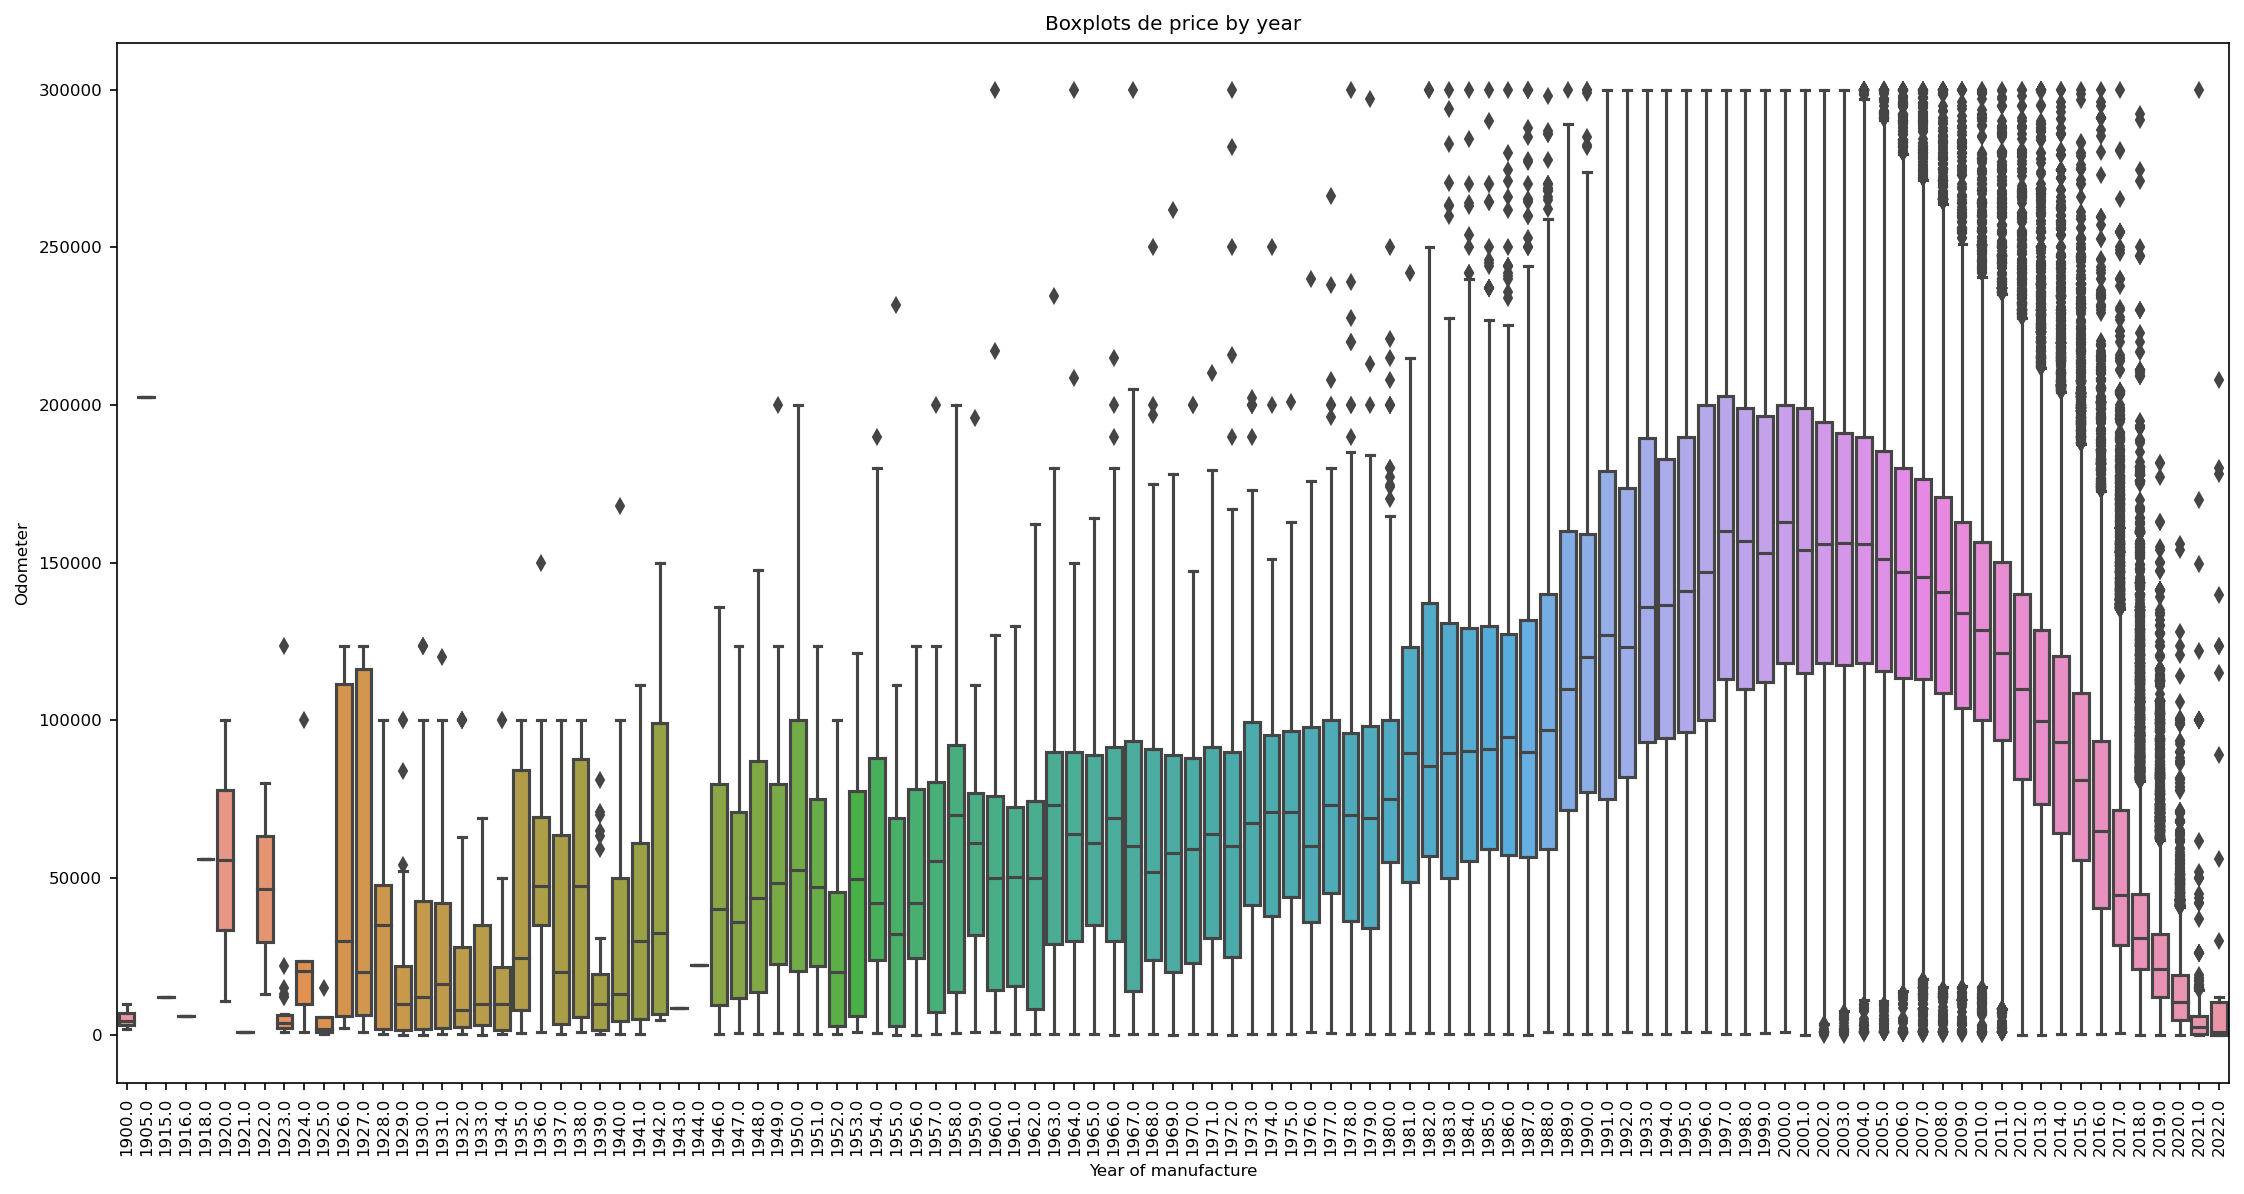

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='odometer', data=vehicles_data)
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots de price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Odometer')
plt.show()

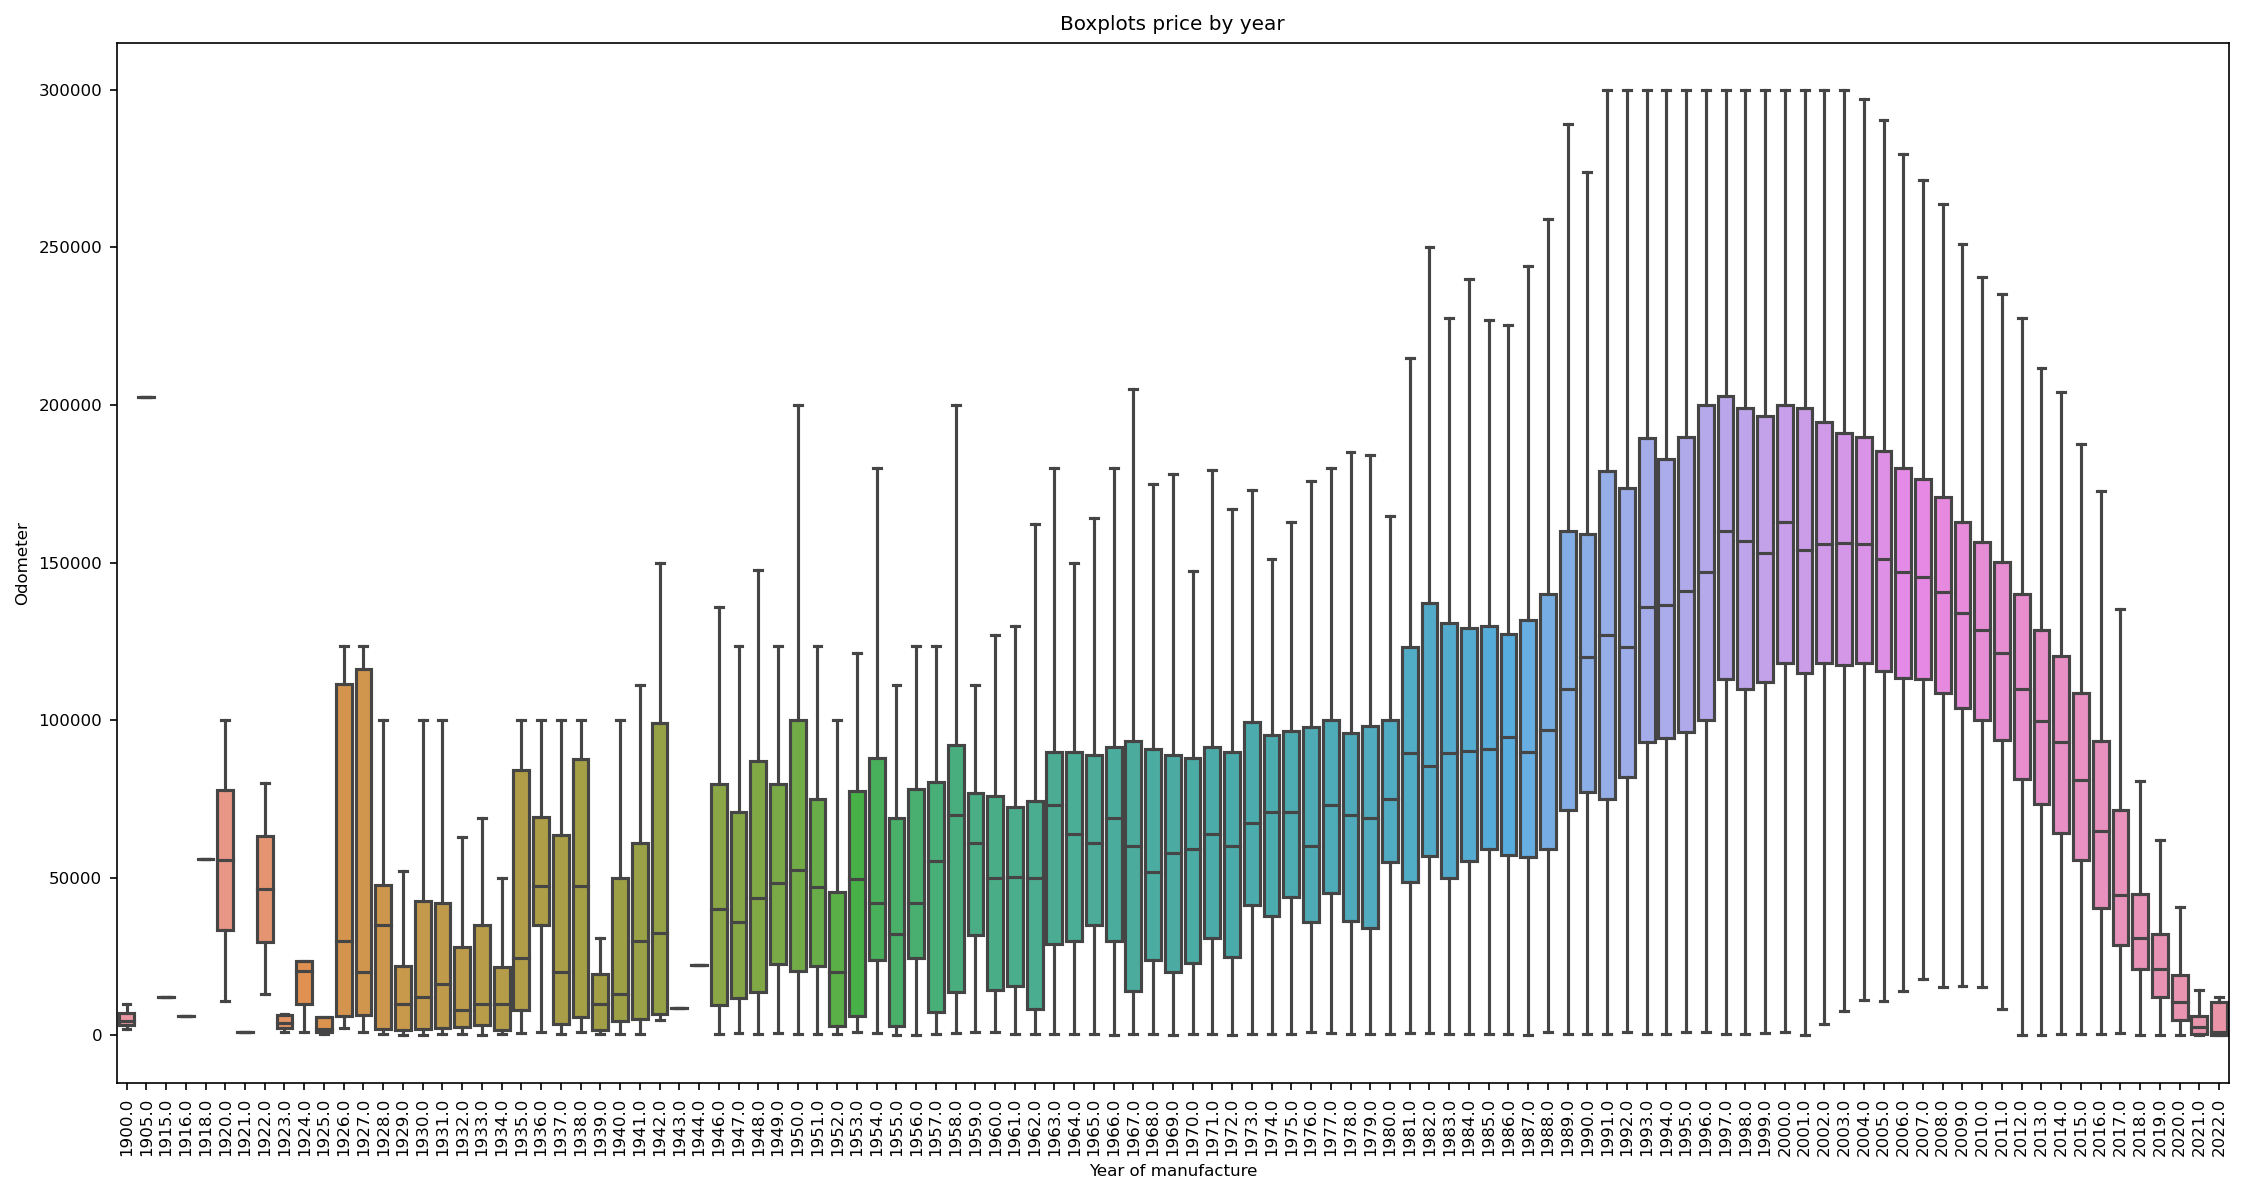

In [32]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='year', y='odometer', data=vehicles_data, showfliers=False)
plt.tick_params(axis='x', rotation=90)
plt.title('Boxplots price by year')
plt.xlabel('Year of manufacture')
plt.ylabel('Odometer')
plt.show()

In [33]:
for year in sorted(vehicles_data["year"].unique()):
    q1 = vehicles_data[vehicles_data["year"] == year]["odometer"].quantile(0.25)
    q3 = vehicles_data[vehicles_data["year"] == year]["odometer"].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - 1*5*IQR
    upper_limit = q3 + 1*5*IQR
    lower_indexes = vehicles_data[(vehicles_data["year"] == year) & (vehicles_data["odometer"] < lower_limit)].index
    upper_indexes = vehicles_data[(vehicles_data["year"] == year) & (vehicles_data["odometer"] > upper_limit)].index
    vehicles_data.drop(index=lower_indexes, axis=0, errors="ignore", inplace=True)
    vehicles_data.drop(index=upper_indexes, axis=0, errors="ignore", inplace=True)

### Year

Finally, we will remove the outlier values for the year variable. In this case, based on the information extracted from the previous graphs, we will make two considerations:
1. As the lower limit: We will only consider cars starting from the year 1908, as it is the minimum value from which mass production of cars began in the United States with the Ford Model T.
2. As the upper limit: We will eliminate the year 2022 because it has very few data points, and its statistics will not be representative. The year 2021 is acceptable since it has at least around 1000 values. However, as shown below, the year 2022 consists of only 36 values.

In [34]:
print("2020:", vehicles_data[vehicles_data["year"] == 2020].shape)
print("2021:", vehicles_data[vehicles_data["year"] == 2021].shape)
print("2022:", vehicles_data[vehicles_data["year"] == 2022].shape)

2020: (16423, 22)
2021: (980, 22)
2022: (36, 22)


Therefore:

In [35]:
low_year = vehicles_data[vehicles_data["year"] < 1908].index
high_year = vehicles_data[vehicles_data["year"] > 2021].index

In [36]:
vehicles_data.drop(index=low_year, axis=0, errors="ignore", inplace=True)
vehicles_data.drop(index=high_year, axis=0, errors="ignore", inplace=True)

### Duplicate values

We have identified a significant issue with duplications within the data range. One might think that using `.drop_duplicates()` could solve this problem, but that is not the case. During the statistical description of categorical variables, we detected a problem of duplicate values in the **VIN**, which must necessarily be unique. We can quickly check the existence of such values:

In [37]:
vehicles_data["VIN"].value_counts()

1FMJU1JT1HEA52352    261
3C6JR6DT3KG560649    235
1FTER1EH1LLA36301    231
5TFTX4CN3EX042751    227
1GCHTCE37G1186784    214
                    ... 
1FDBF2A62EEA27700      1
1GKS1HKC4FR222593      1
WDDGF54X19F217462      1
1FTRF18W5YNC10113      1
SAJGX2749VCOO8376      1
Name: VIN, Length: 98297, dtype: int64

As we can see, there are cars that have supposedly been "sold" 261 times. This is strange at first glance. When we analyze one of these cases, we find the following:

In [38]:
vehicles_data[vehicles_data["VIN"] == "1FMJU1JT1HEA52352"].head()

id                    region  price    year manufacturer  \
76    7311818189                    auburn  29590  2017.0         ford   
707   7311865995                birmingham  29590  2017.0         ford   
1935  7311801032                    dothan  29590  2017.0         ford   
2201  7311915565  florence / muscle shoals  29590  2017.0         ford   
2377  7311823034          gadsden-anniston  29590  2017.0         ford   

                     model condition    cylinders fuel  odometer  ...  \
76    expedition xlt sport      good  6 cylinders  gas   70760.0  ...   
707   expedition xlt sport      good  6 cylinders  gas   70760.0  ...   
1935  expedition xlt sport      good  6 cylinders  gas   70760.0  ...   
2201  expedition xlt sport      good  6 cylinders  gas   70760.0  ...   
2377  expedition xlt sport      good  6 cylinders  gas   70760.0  ...   

                    VIN drive size type paint_color  \
76    1FMJU1JT1HEA52352   4wd  NaN  SUV        blue   
707   1FMJU1JT1HEA52352   4wd  NaN  SUV        blue   
1935  1FMJU1JT1HEA52352   4wd  NaN  SUV        blue   
2201  1FMJU1JT1HEA52352   4wd  NaN  SUV        blue   
2377  1FMJU1JT1HEA52352   4wd  NaN  SUV        blue   

                                            description state      lat  \
76    Carvana is the safer way to buy a car During t...    al  32.5900   
707   Carvana is the safer way to buy a car During t...    al  33.5200   
1935  Carvana is the safer way to buy a car During t...    al  31.2300   
2201  Carvana is the safer way to buy a car During t...    al  33.7865   
2377  Carvana is the safer way to buy a car During t...    al  34.0100   

         long              posting_date  
76   -85.4800  2021-04-24T08:52:07-0500  
707  -86.7900  2021-04-24T10:21:06-0500  
1935 -85.4000  2021-04-24T08:08:57-0500  
2201 -84.4454  2021-04-24T11:41:02-0500  
2377 -86.0100  2021-04-24T09:01:32-0500  

[5 rows x 22 columns]

This indicates that the professional seller has posted the same advertisement in each of the regions or states to maximize visibility for the ad. However, this doesn't imply that the car has been sold 261 times. If we don't remove these values, it could artificially skew our analysis for this make or model in later stages.

Therefore, using the **manufacturer**, **model**, **price**, **year**, and **VIN** as reference values, we will proceed to remove all duplicates we find:

In [39]:
vehicles_data.drop_duplicates(subset=["price", "year", "manufacturer", "model", "VIN"], keep="first", inplace=True)

### Columns with NaN values

At the beginning, we observed that some columns had a serious issue with null values. Now that we have performed these initial cleanings, let us see how the structure may have changed:

In [40]:
vehicles_data.isna().sum() / vehicles_data.shape[0] * 100

id               0.000000
region           0.000000
price            0.000000
year             0.178757
manufacturer     3.898510
model            1.331639
condition       39.353161
cylinders       35.043911
fuel             0.516688
odometer         0.541794
title_status     0.000000
transmission     0.380110
VIN             48.333191
drive           26.617726
size            63.724373
type            24.225595
paint_color     27.587332
description      0.001004
state            0.000000
lat              0.530748
long             0.530748
posting_date     0.000000
dtype: float64

As we established a 40% threshold for removing null values, let us remove all columns that meet this condition. Additionally, we will remove the "title_status" column because, based on the cleaning performed, we know it only contains the value "clean" and, therefore, does not provide us with any useful information.

In [41]:
vehicles_data.drop(columns=["VIN", "size", "title_status"], inplace=True)

### Remove remaining NaNs

Once the cleaning is completed, we only need to remove the data containing any NaN values, like this:

In [42]:
vehicles_data.dropna(inplace=True)

In [43]:
vehicles_data.isna().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
drive           0
type            0
paint_color     0
description     0
state           0
lat             0
long            0
posting_date    0
dtype: int64

The remaining features are:

In [44]:
vehicles_data.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

To conclude the cleaning process, let us check the total number of remaining rows and their percentage compared to the original total:

In [45]:
shape_after_cleaning = vehicles_data.shape
print(shape_after_cleaning)

(66604, 19)


The remaining percentage is:

In [46]:
print(f"{round((shape_after_cleaning[0] / shape_before_cleaning[0] * 100), 3)}%")

15.603%


In [47]:
vehicles_data['odometer'] = vehicles_data['odometer'].astype("int64")
vehicles_data['year'] = vehicles_data['year'].astype("int64")

## Feature Relations

Let us proceed to check for possible correlations between variables. What we are most interested in are those variables that are related to the price of the vehicle:

In [48]:
vehicles_data.corr(numeric_only=True)

id     price      year  odometer       lat      long
id        1.000000 -0.037570 -0.006329  0.031201 -0.044632 -0.138358
price    -0.037570  1.000000  0.259577 -0.514605 -0.008552 -0.103799
year     -0.006329  0.259577  1.000000 -0.160661 -0.001649  0.008247
odometer  0.031201 -0.514605 -0.160661  1.000000  0.009844  0.025406
lat      -0.044632 -0.008552 -0.001649  0.009844  1.000000 -0.017367
long     -0.138358 -0.103799  0.008247  0.025406 -0.017367  1.000000

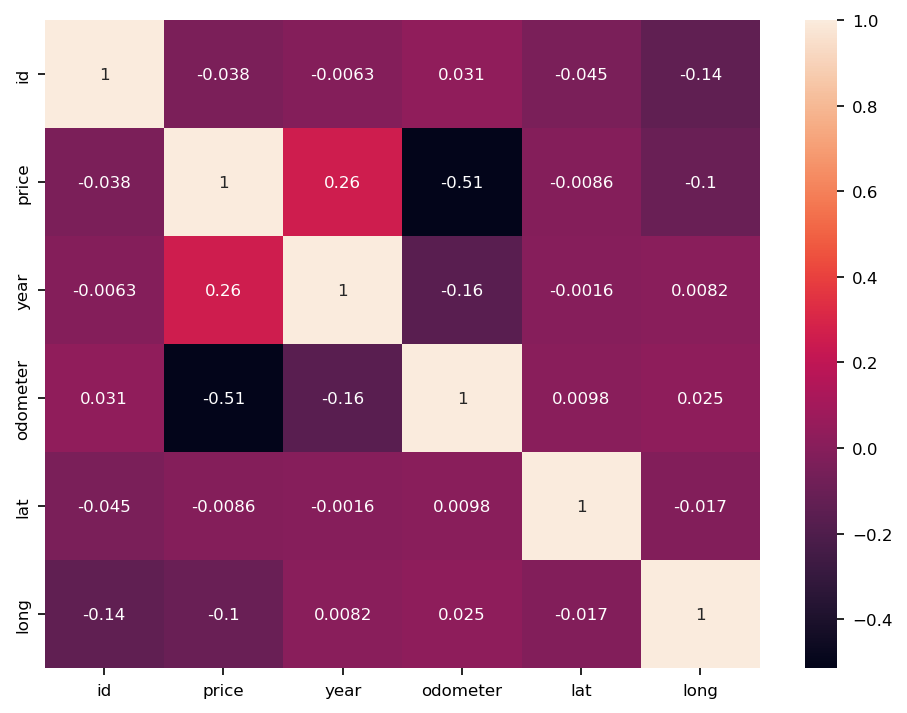

In [49]:
sns.heatmap(vehicles_data.corr(numeric_only=True), annot=True)
plt.show()

As we can see, and as expected, the two most important numeric variables with respect to price are the odometer and the year of manufacture. Regarding the latter, there is a positive correlation that indicates that the higher the year of manufacture (and therefore, the fewer years the vehicle has been manufactured), the higher its value.

### Price VS Year

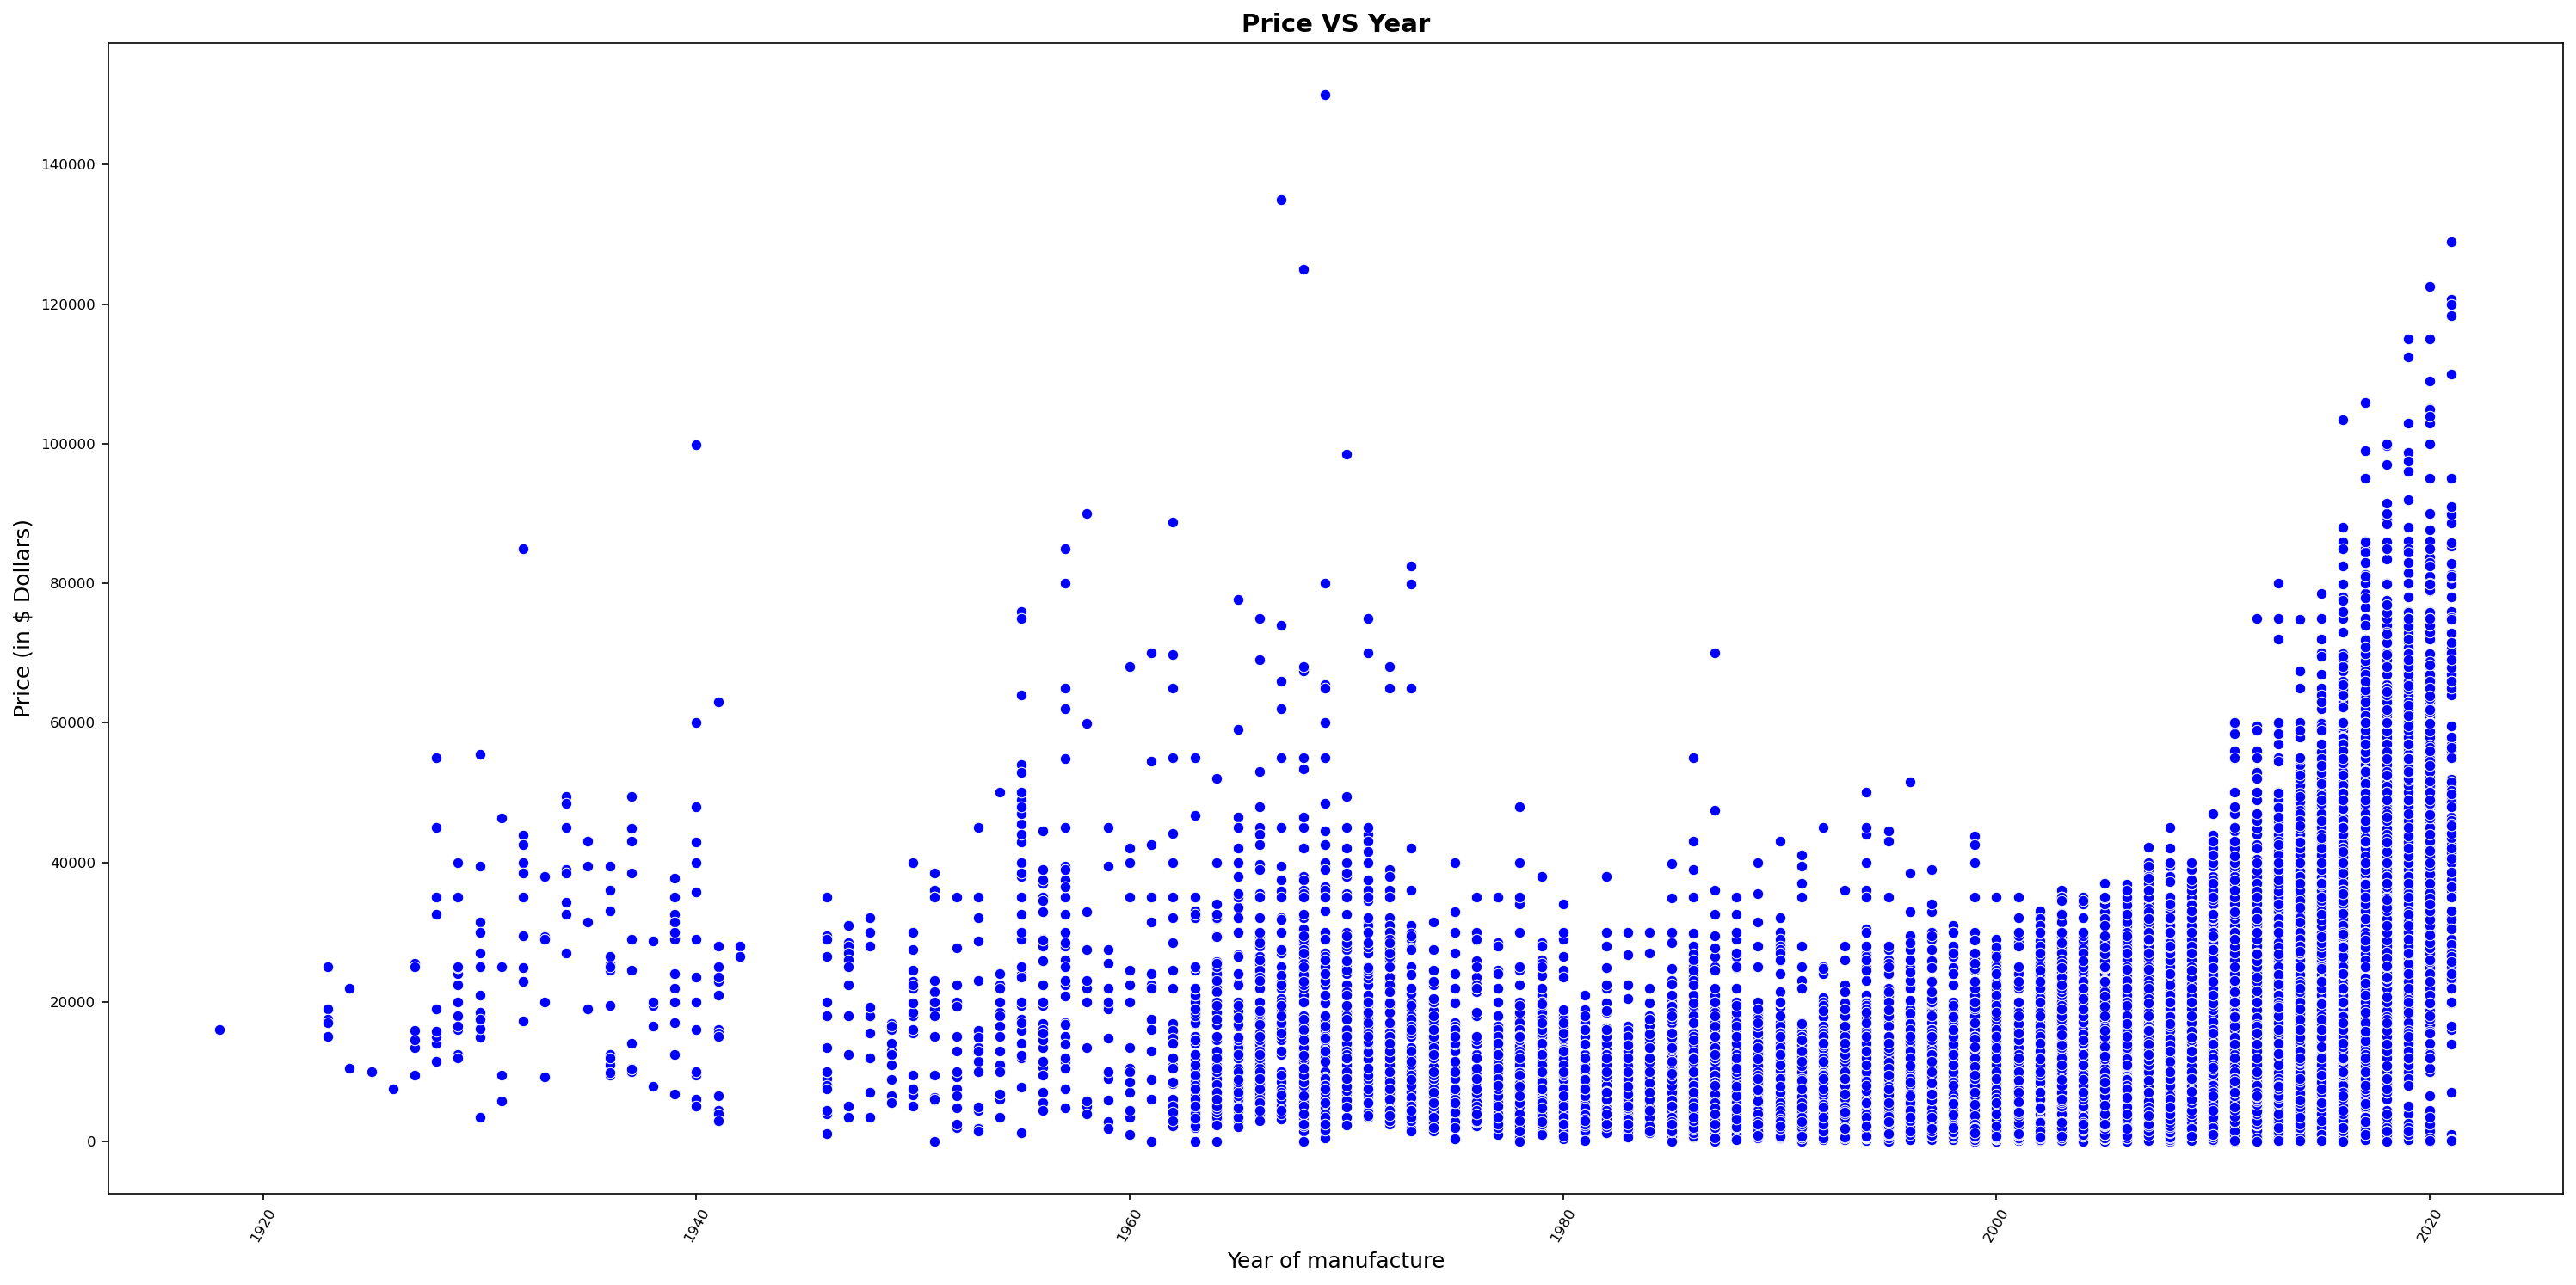

In [50]:
plt.figure(figsize =(20,10))
sns.scatterplot(data=vehicles_data, y='price',x='year', color="blue")
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

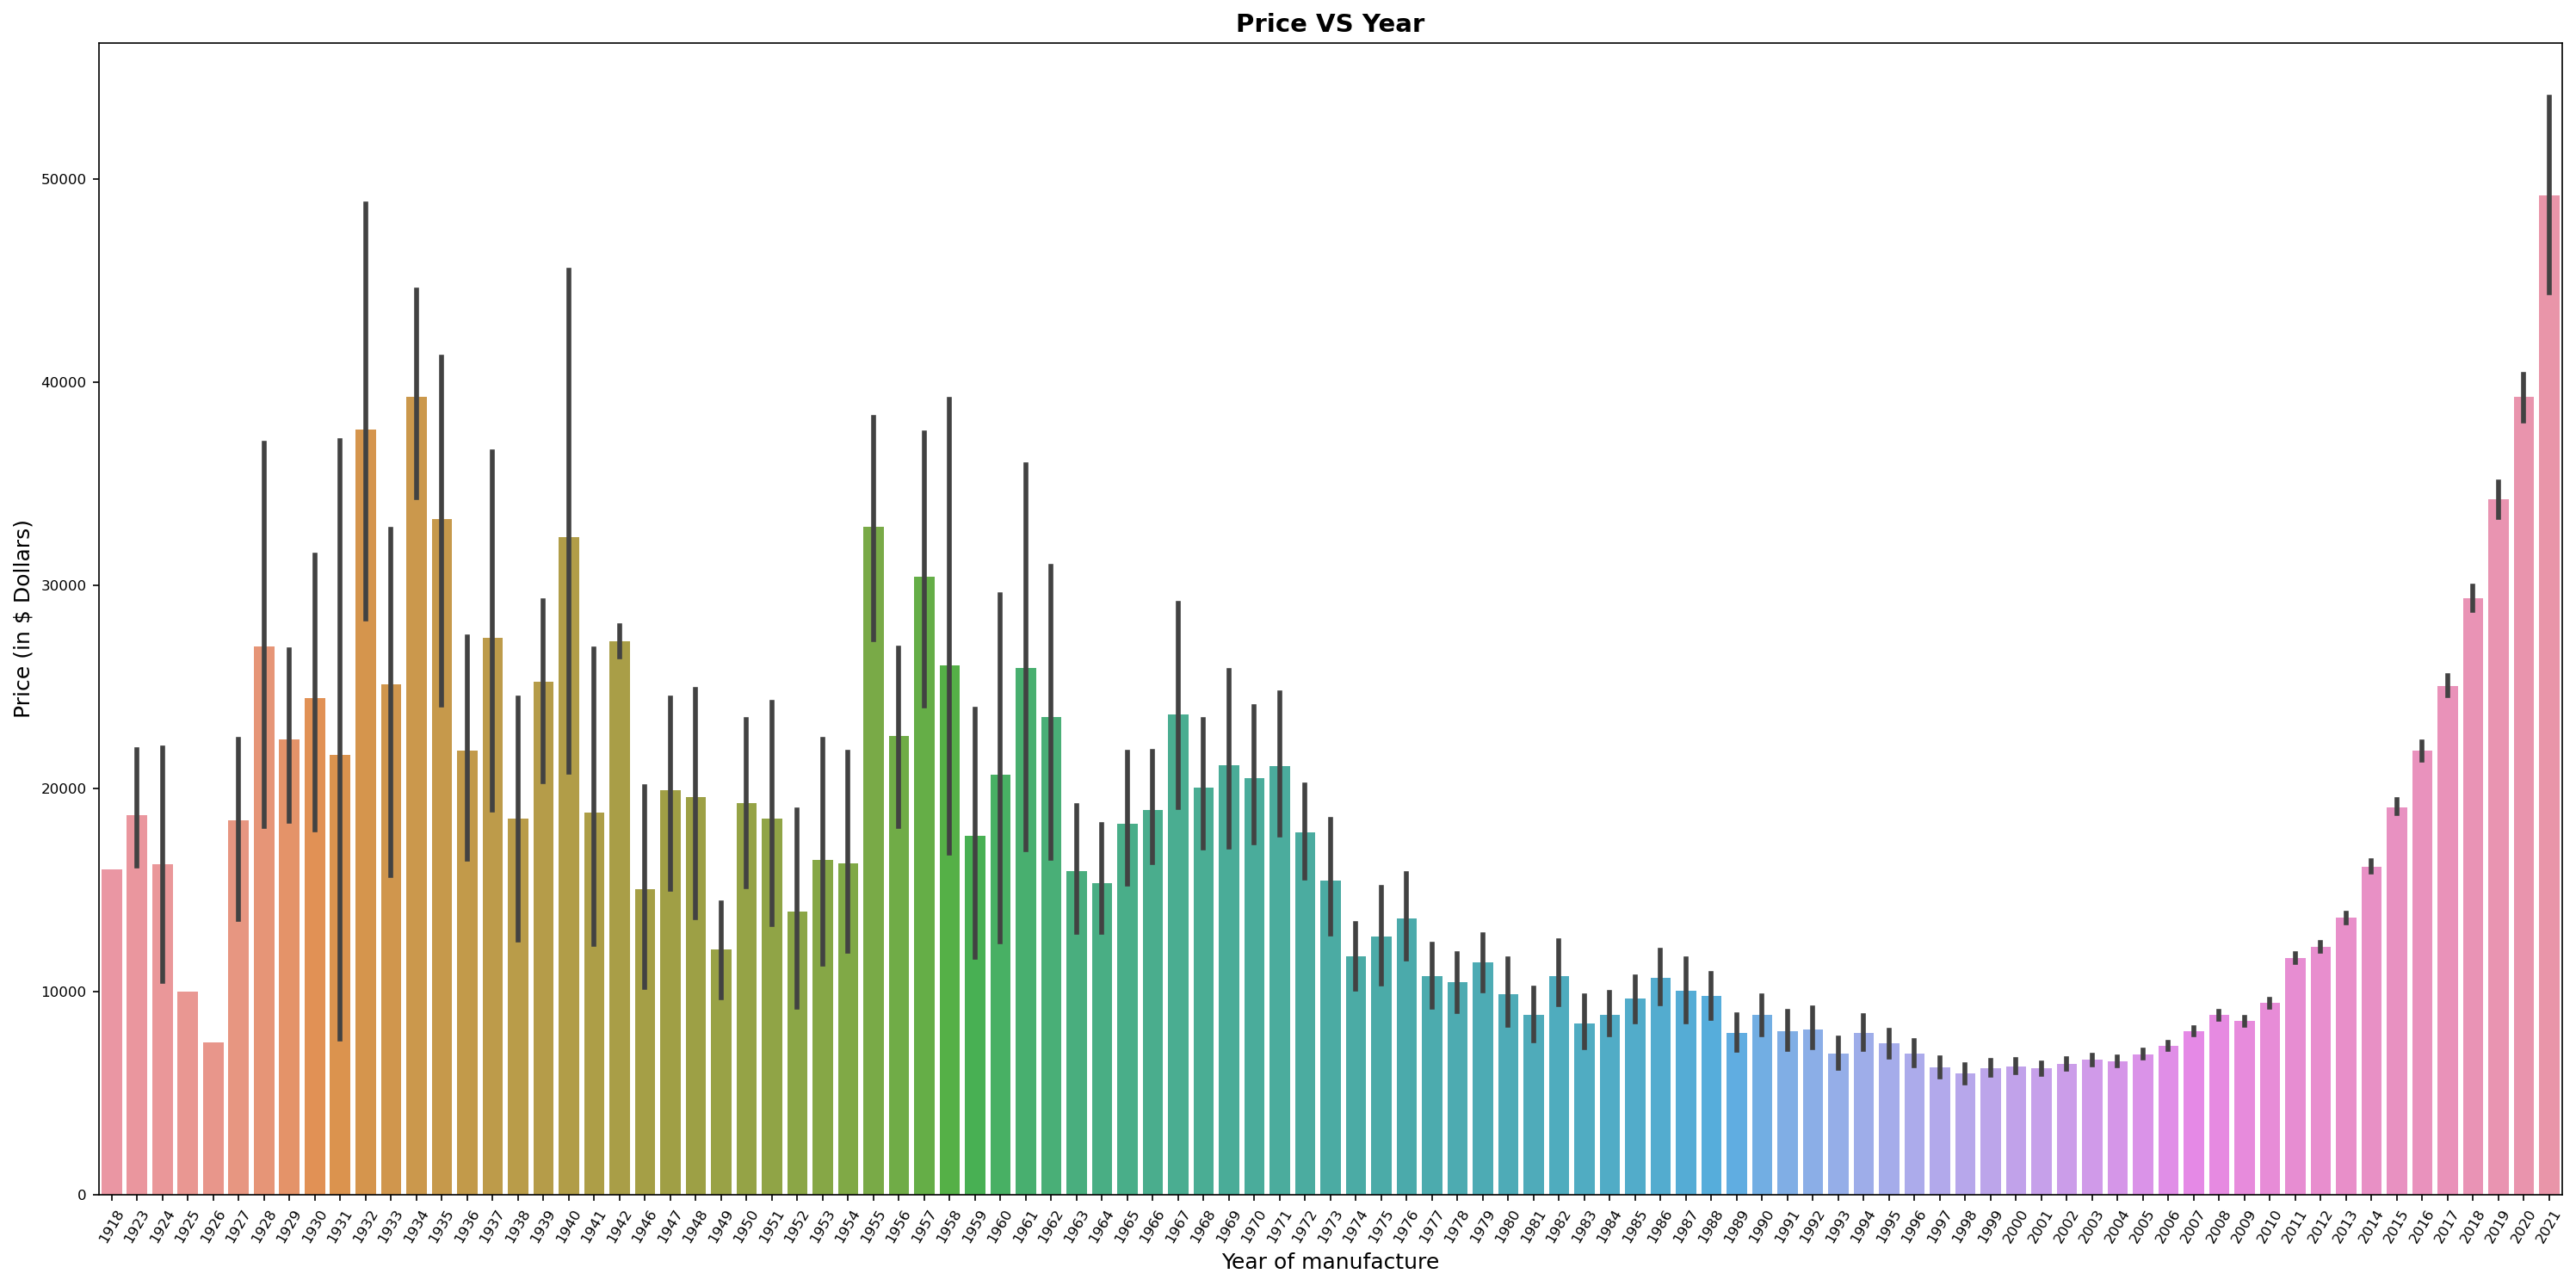

In [51]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=vehicles_data, y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

The drop in values concerning the years is clear; however, we must be cautious with older cars because the classic car market is no longer solely governed by the age of the vehicle and starts to consider other factors such as originality, production rarity, condition, or odometer reading. This graph leads us to consider that there are two distinct groups of cars, the utility vehicles and the classics. Naturally, the correlation is very strong between price and year for all cars manufactured after 1998:

#### Post 1998

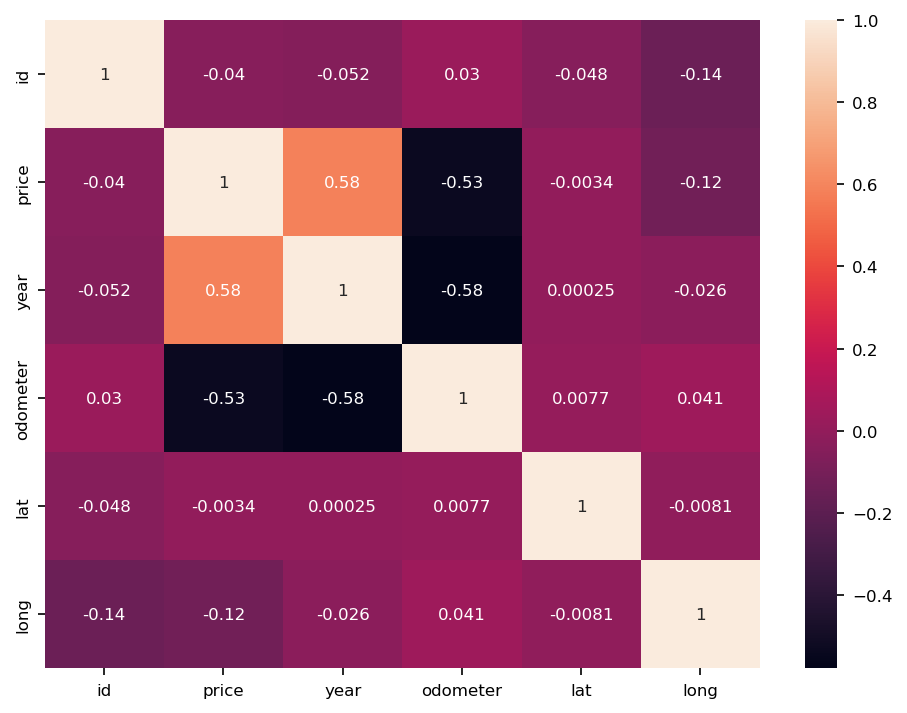

In [52]:
sns.heatmap(vehicles_data[vehicles_data["year"] >= 1998].corr(numeric_only=True), annot=True)
plt.show()

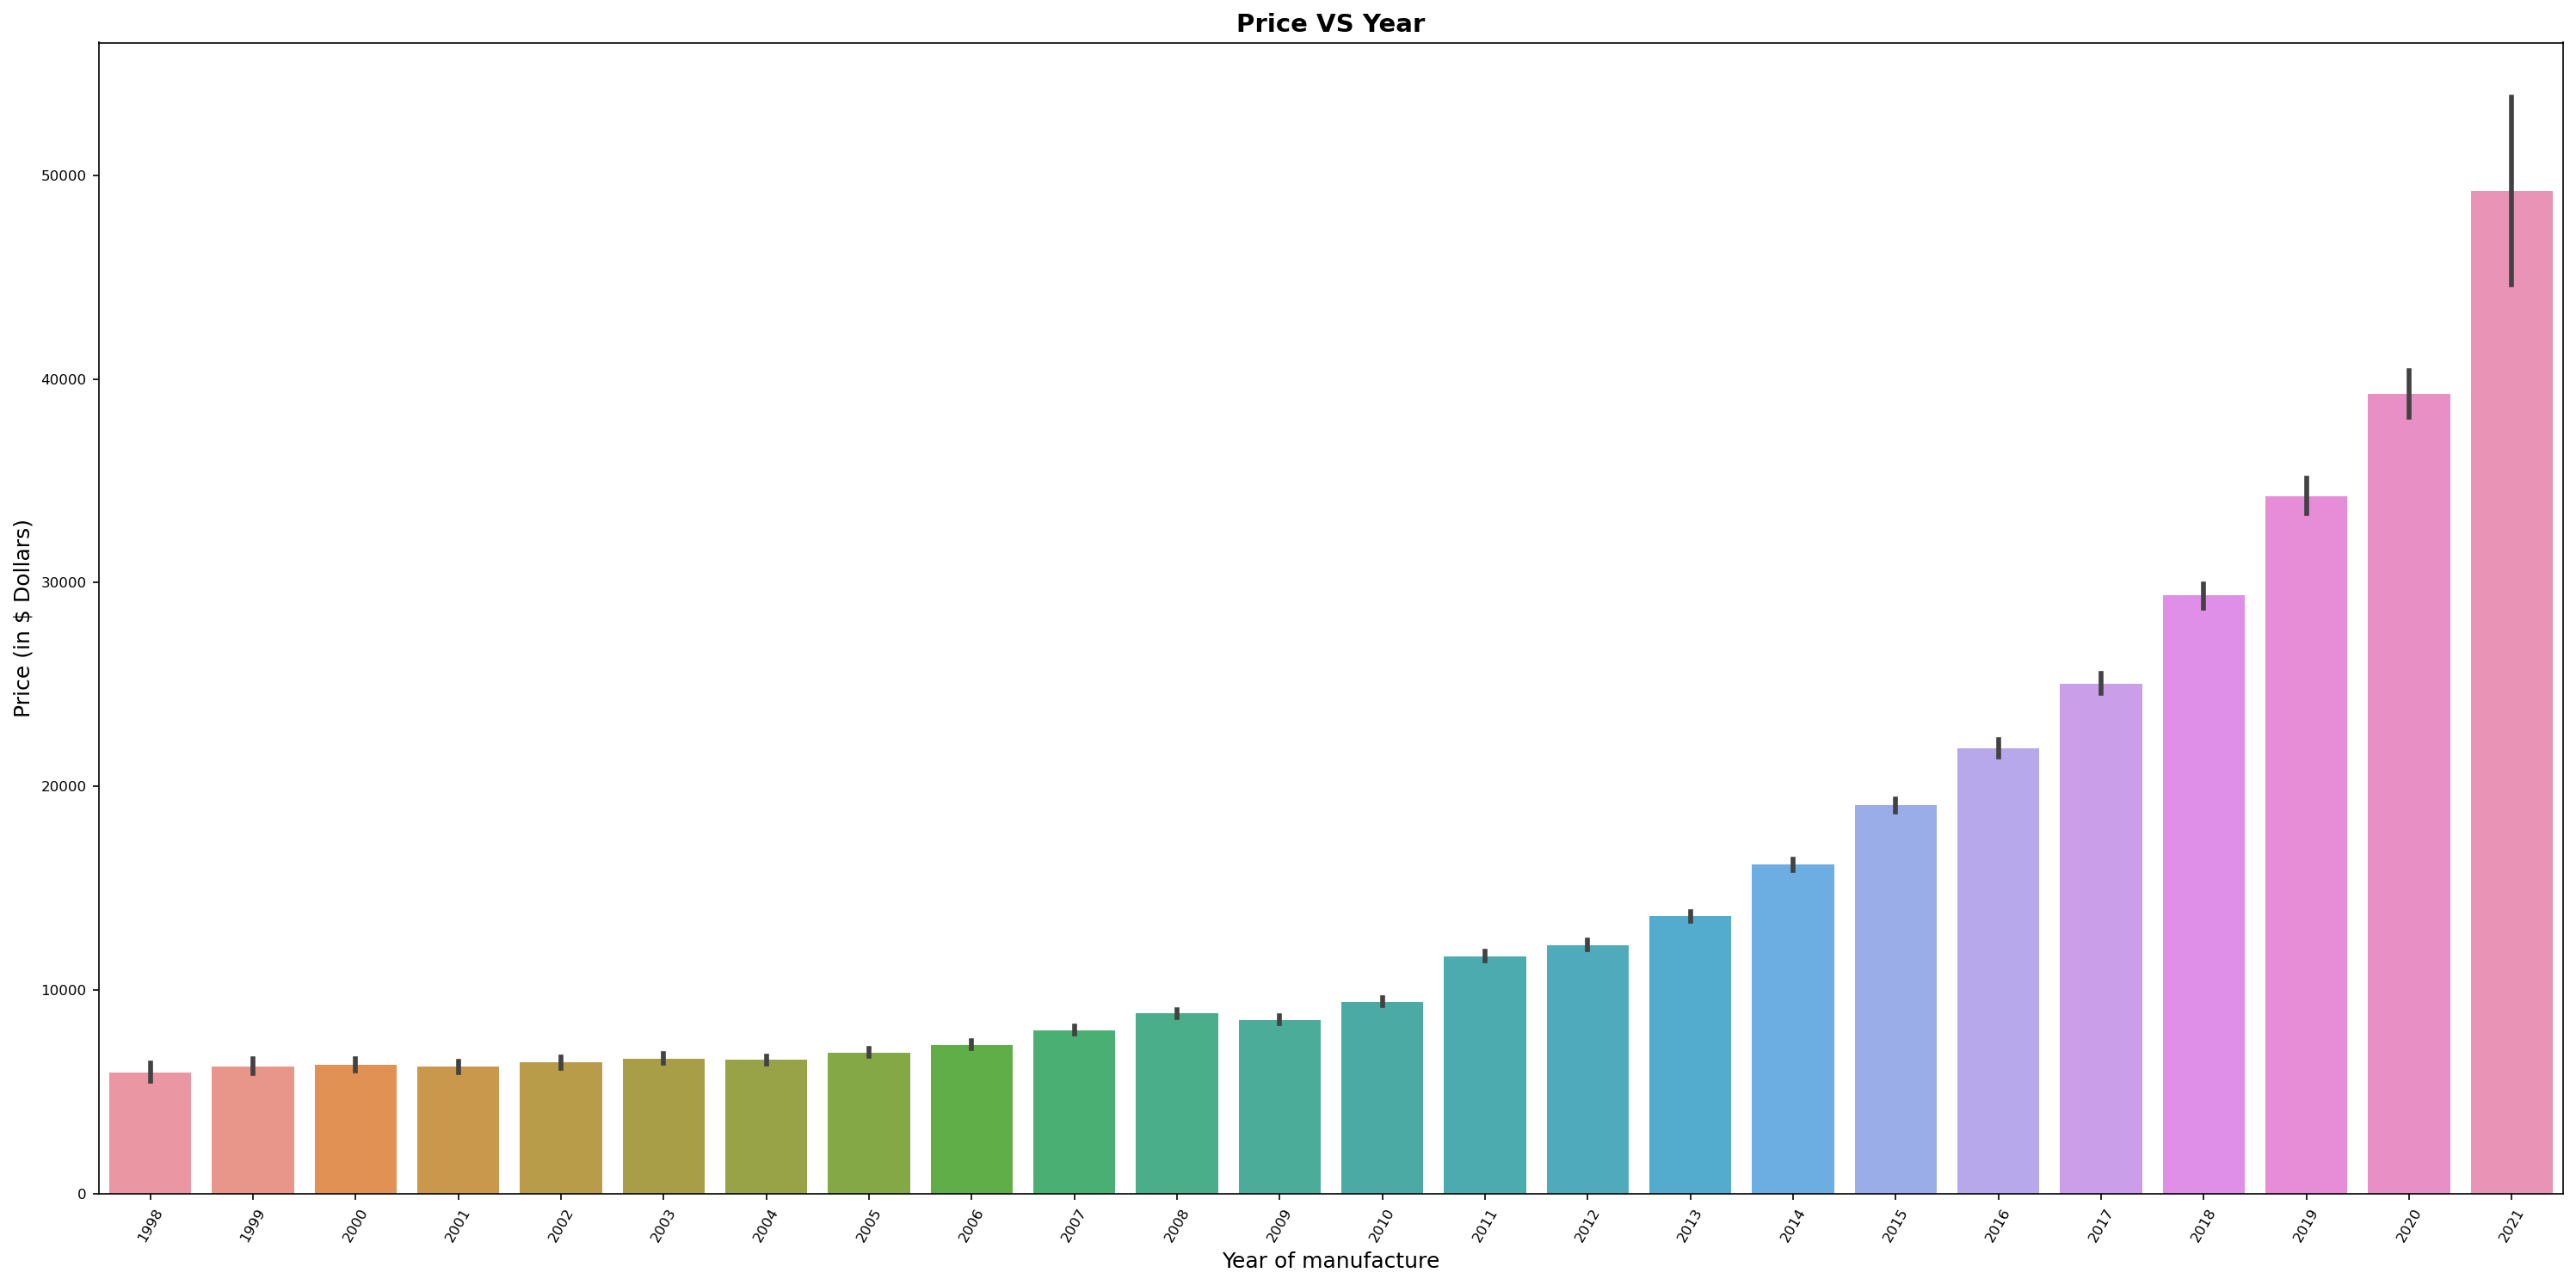

In [53]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=vehicles_data[vehicles_data["year"] >= 1998], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

#### Pre 1998

In this case, the situation is reversed, and the age adds value to the car:

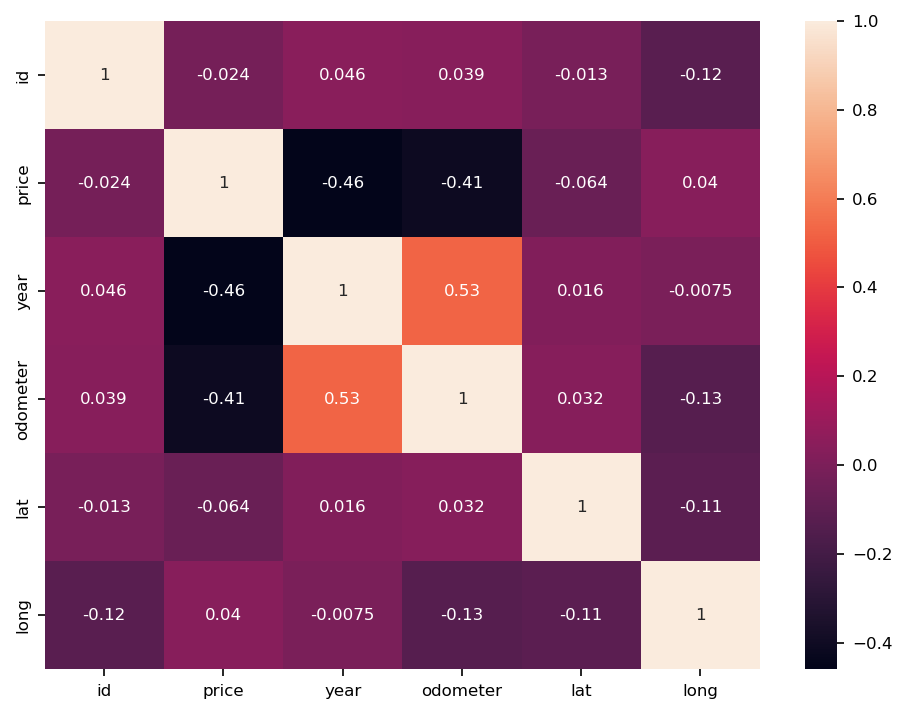

In [54]:
sns.heatmap(vehicles_data[vehicles_data["year"] < 1998].corr(numeric_only=True), annot=True)
plt.show()

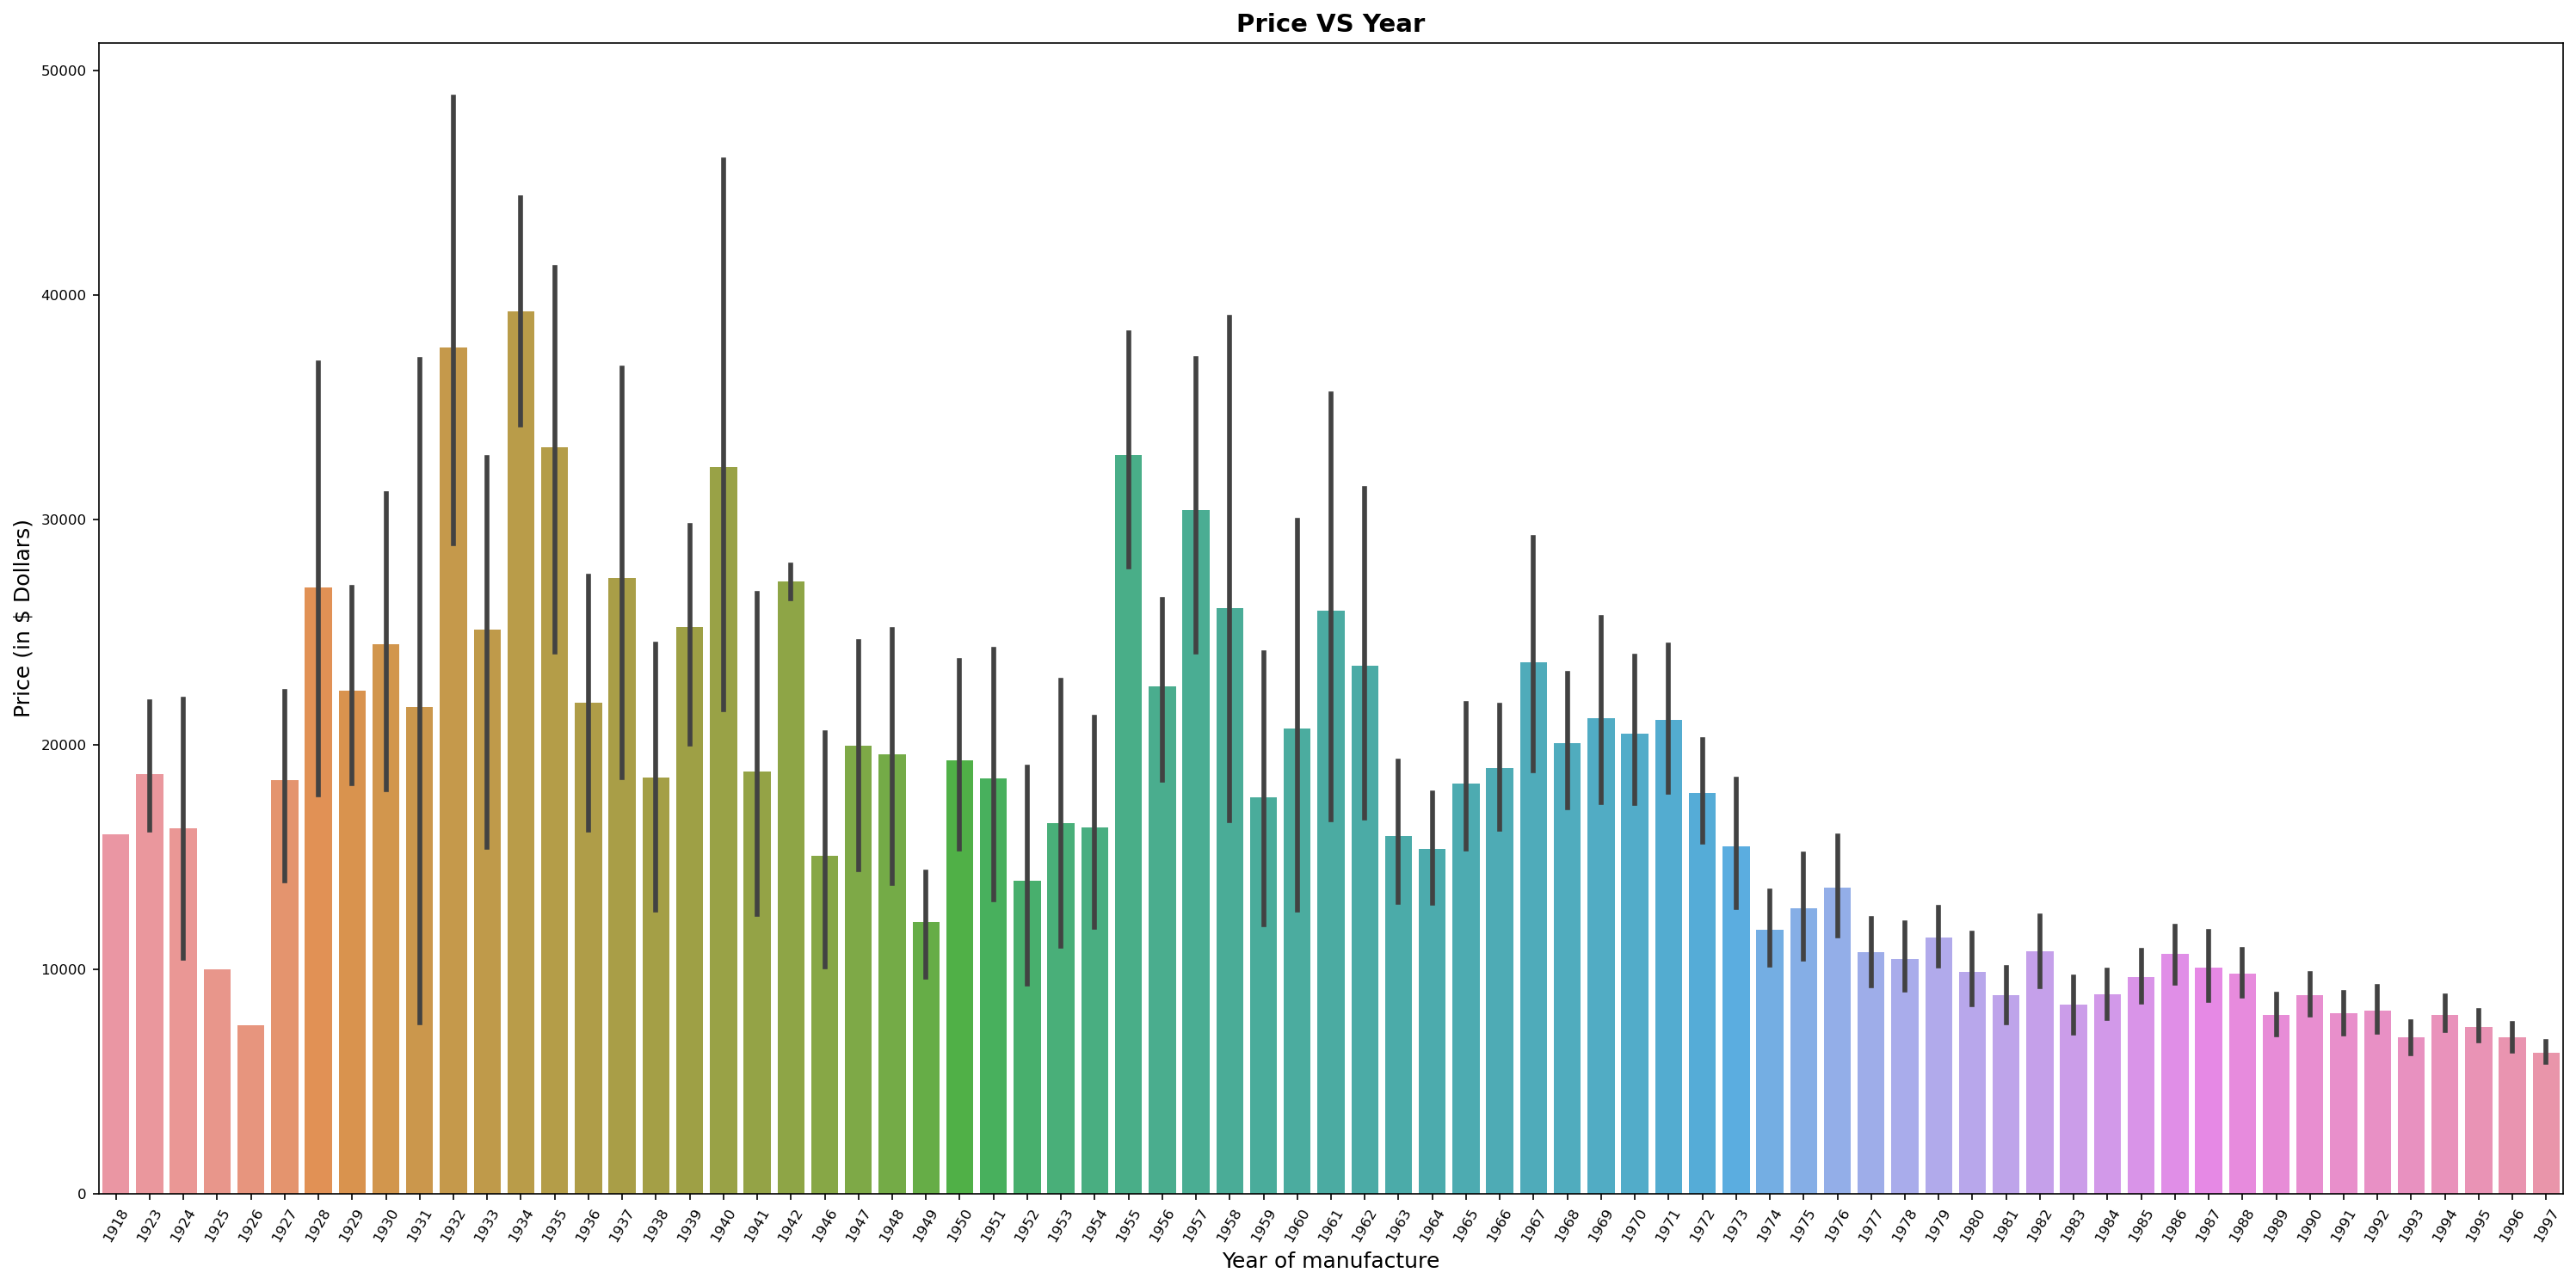

In [55]:
sns.set_palette('summer_r')
plt.figure(figsize =(20,10))
sns.barplot(data=vehicles_data[vehicles_data["year"] < 1998], y='price',x='year')
plt.title("Price VS Year",fontsize=14,fontweight ='bold')
plt.xlabel('Year of manufacture',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

### Price VS Odometer

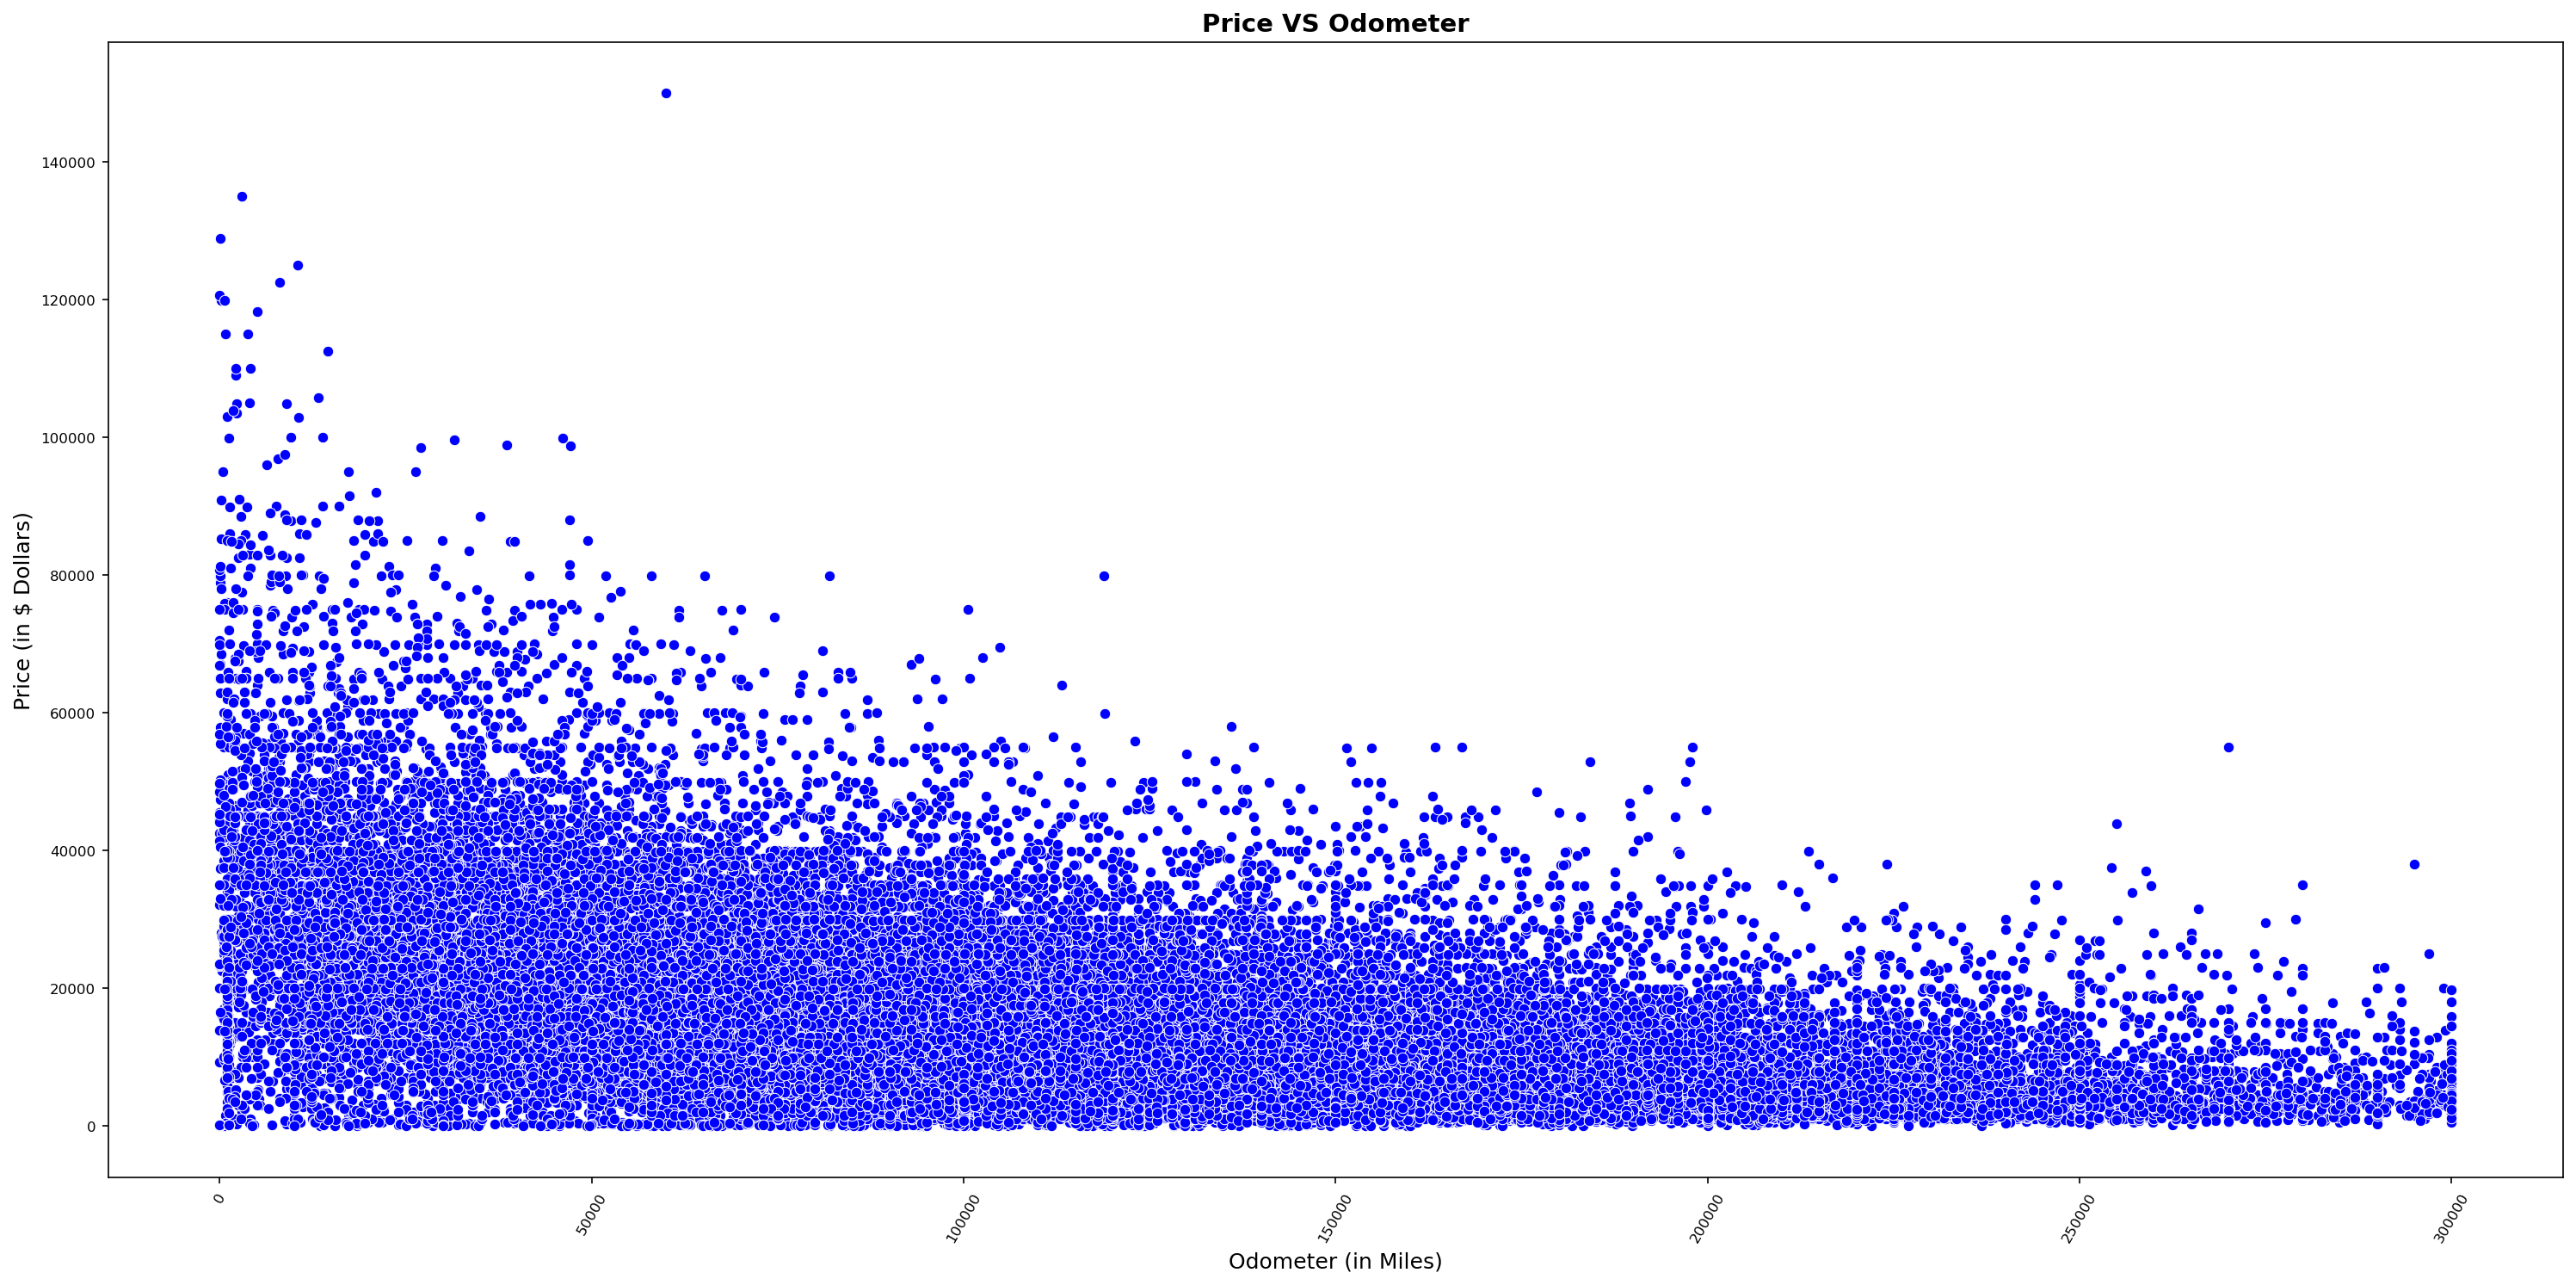

In [56]:
plt.figure(figsize =(20,10))
sns.scatterplot(data=vehicles_data, y='price',x='odometer', color="blue")
plt.title("Price VS Odometer",fontsize=14,fontweight ='bold')
plt.xlabel('Odometer (in Miles)',fontsize = 12)
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)',fontsize = 12)
plt.tight_layout()
plt.show()

Here, the trend is clear and explains the negative correlation: the higher the mileage, the lower the price.

### Pairplot

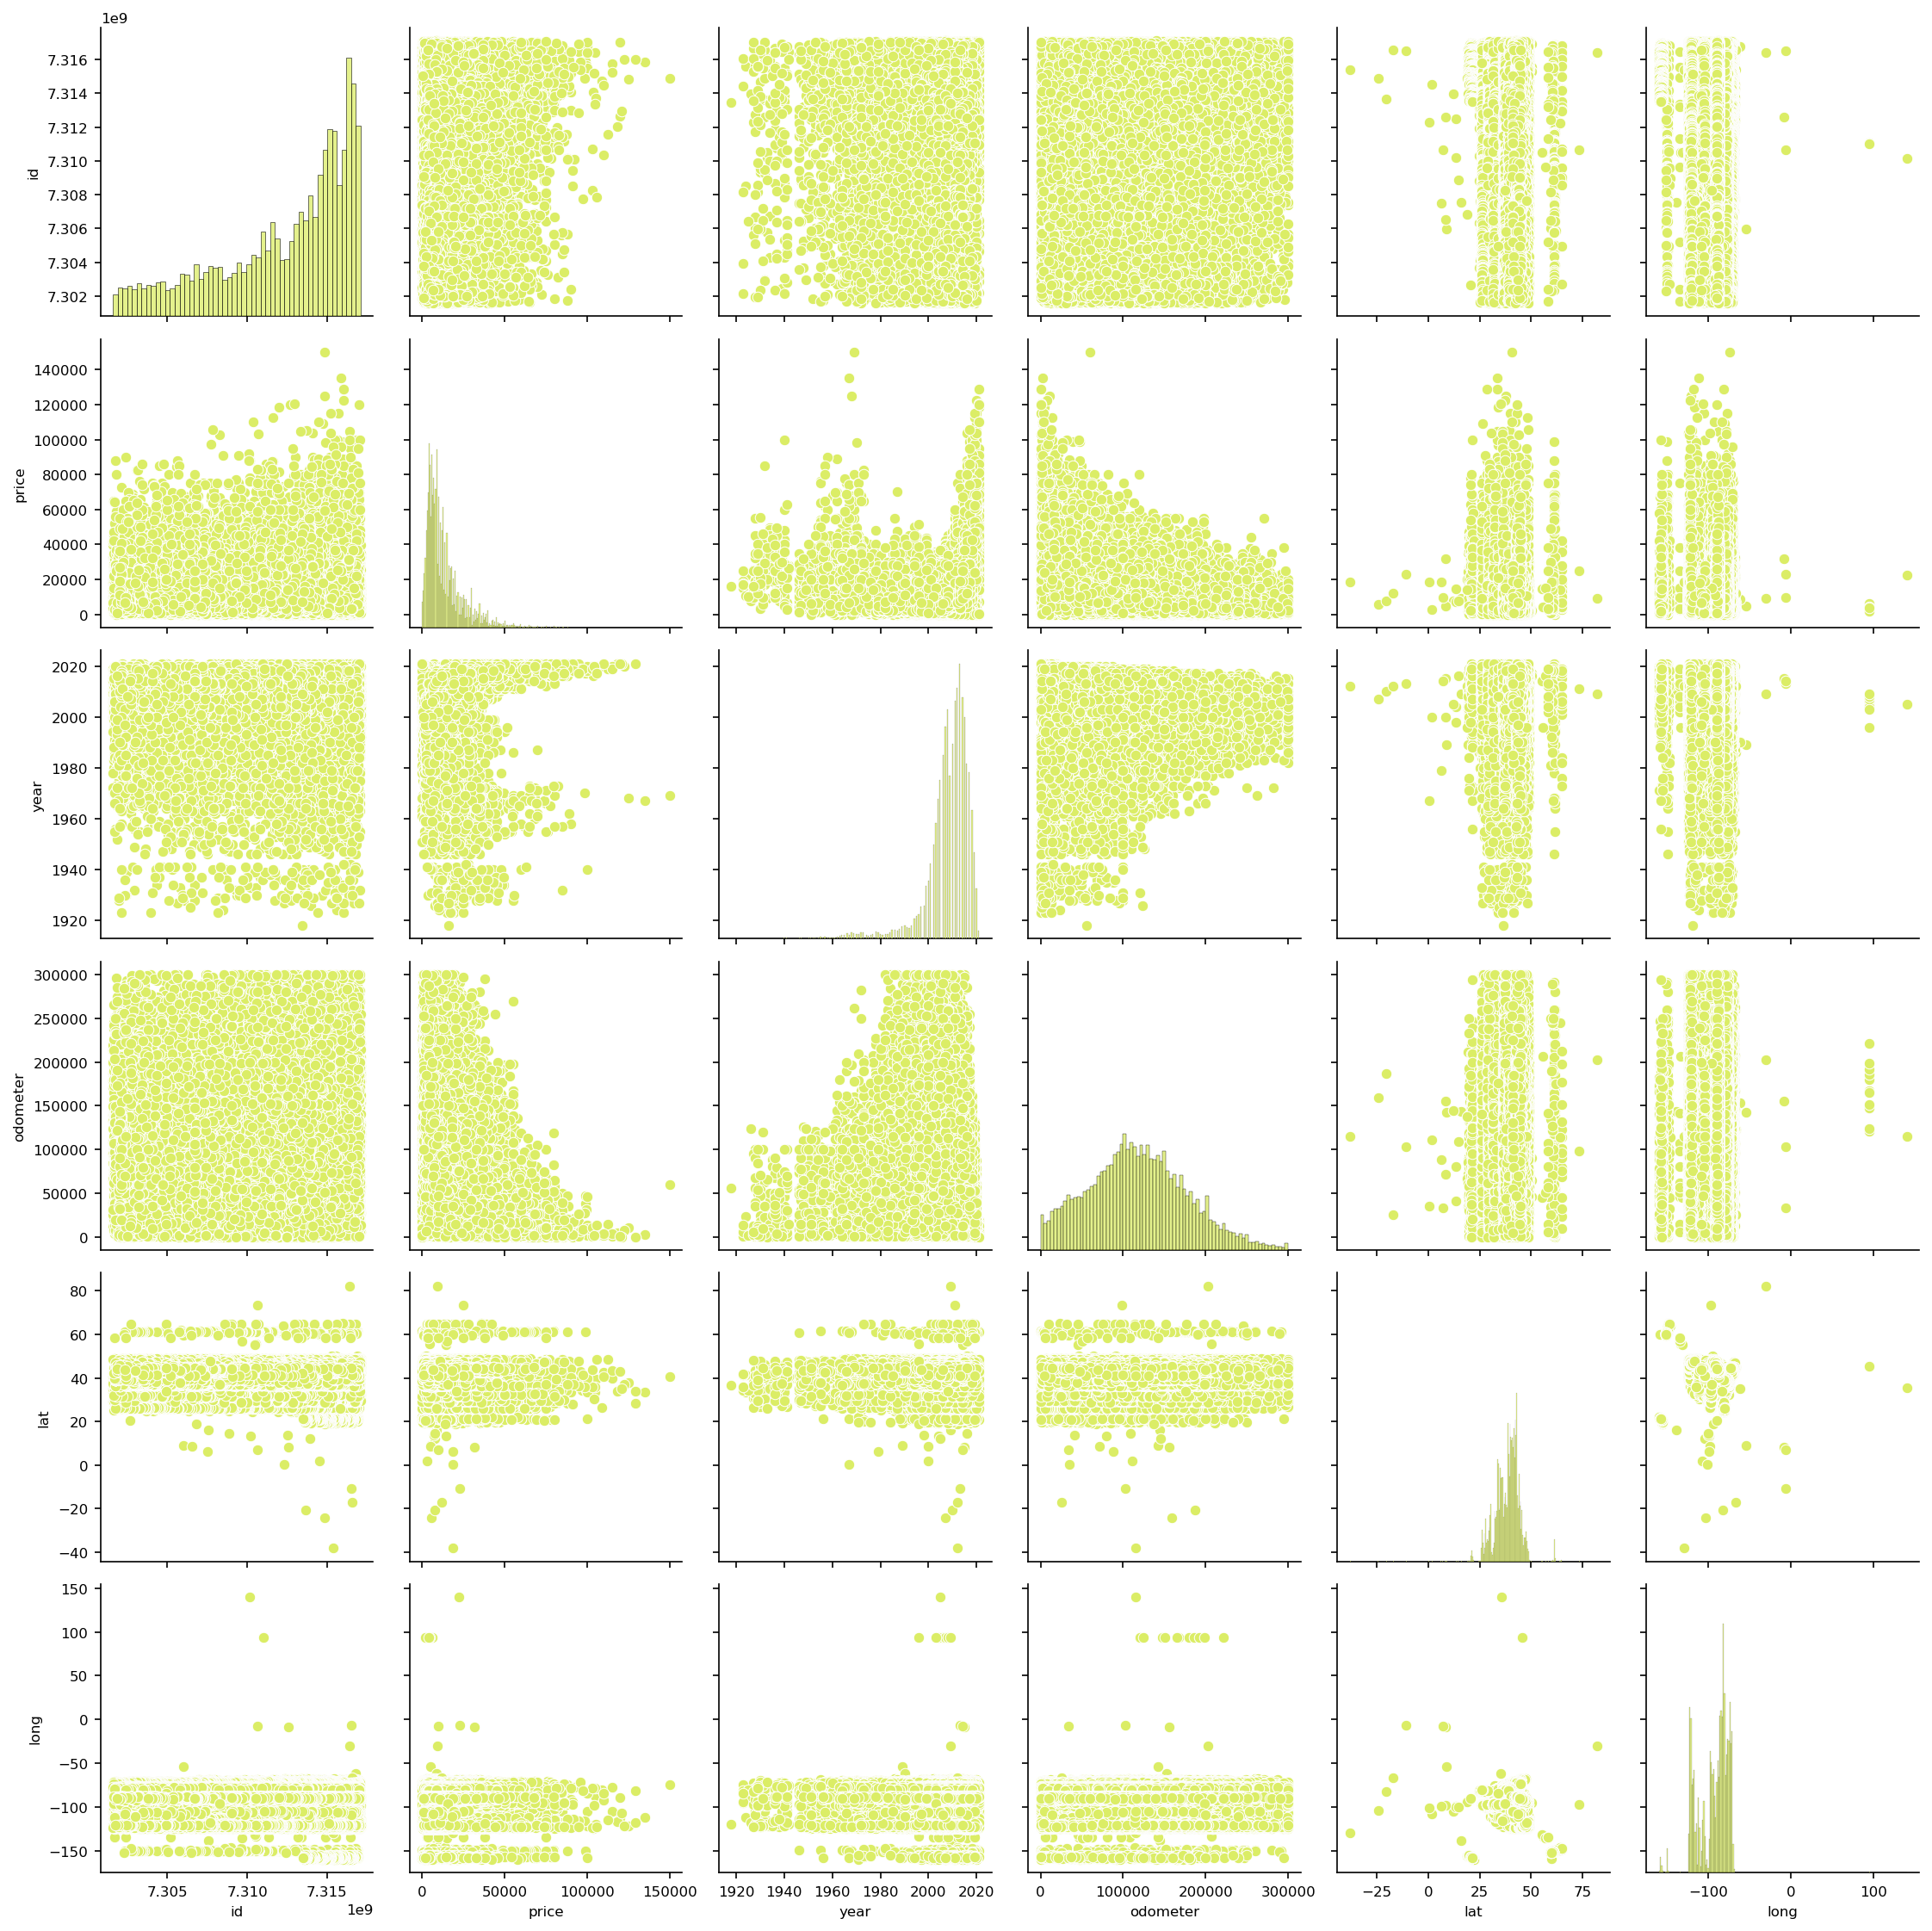

In [57]:
sns.pairplot(data=vehicles_data)
plt.show()

## Feature Analysis
### Odometer

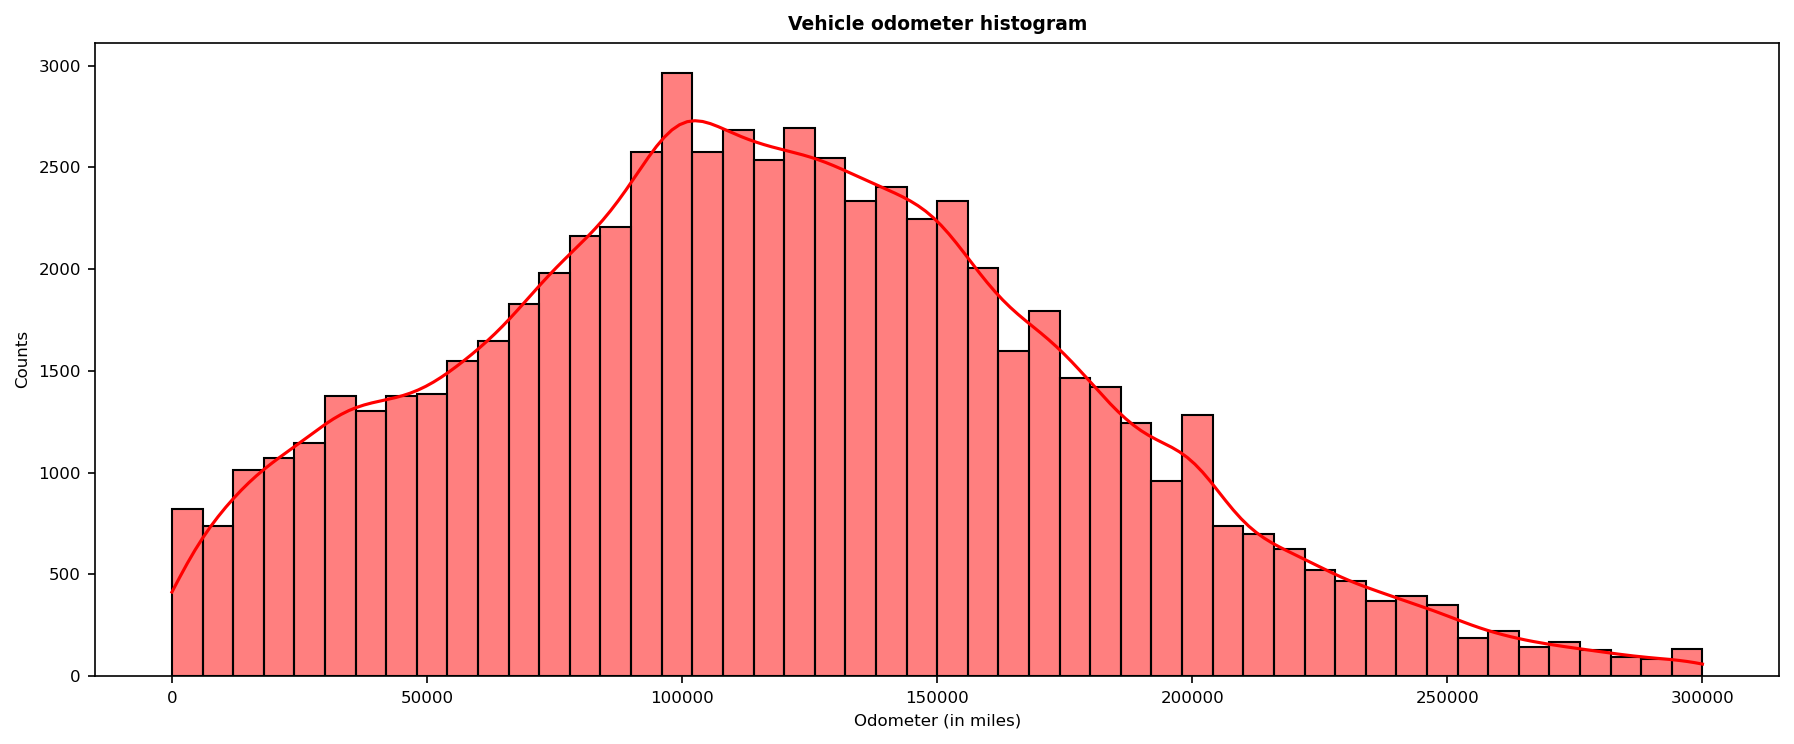

In [58]:
plt.figure(figsize =(12,5))
sns.histplot(data=vehicles_data, x="odometer", bins=50, kde=True, color='red')
plt.title("Vehicle odometer histogram",fontsize=9,fontweight ='bold')
plt.xlabel('Odometer (in miles)')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

What we see is that the odometer follows a relatively symmetric distribution. The mean and median values are similar, around 115,000 miles (~185,000 km):

In [59]:
print("mean:", round(vehicles_data["odometer"].mean(),3))
print("median:", round(vehicles_data["odometer"].median(),3))

mean: 118085.054
median: 115835.5


In this case, the peak point represents the breaking point for most vehicles in this specific dataset. Beyond 120,000 miles, the number of cars decreases because they are sent to scrapyards and exit the commercial circuit. This average breaking point is crucial for estimating the potential remaining lifespan of vehicles in our ownership.

### Year

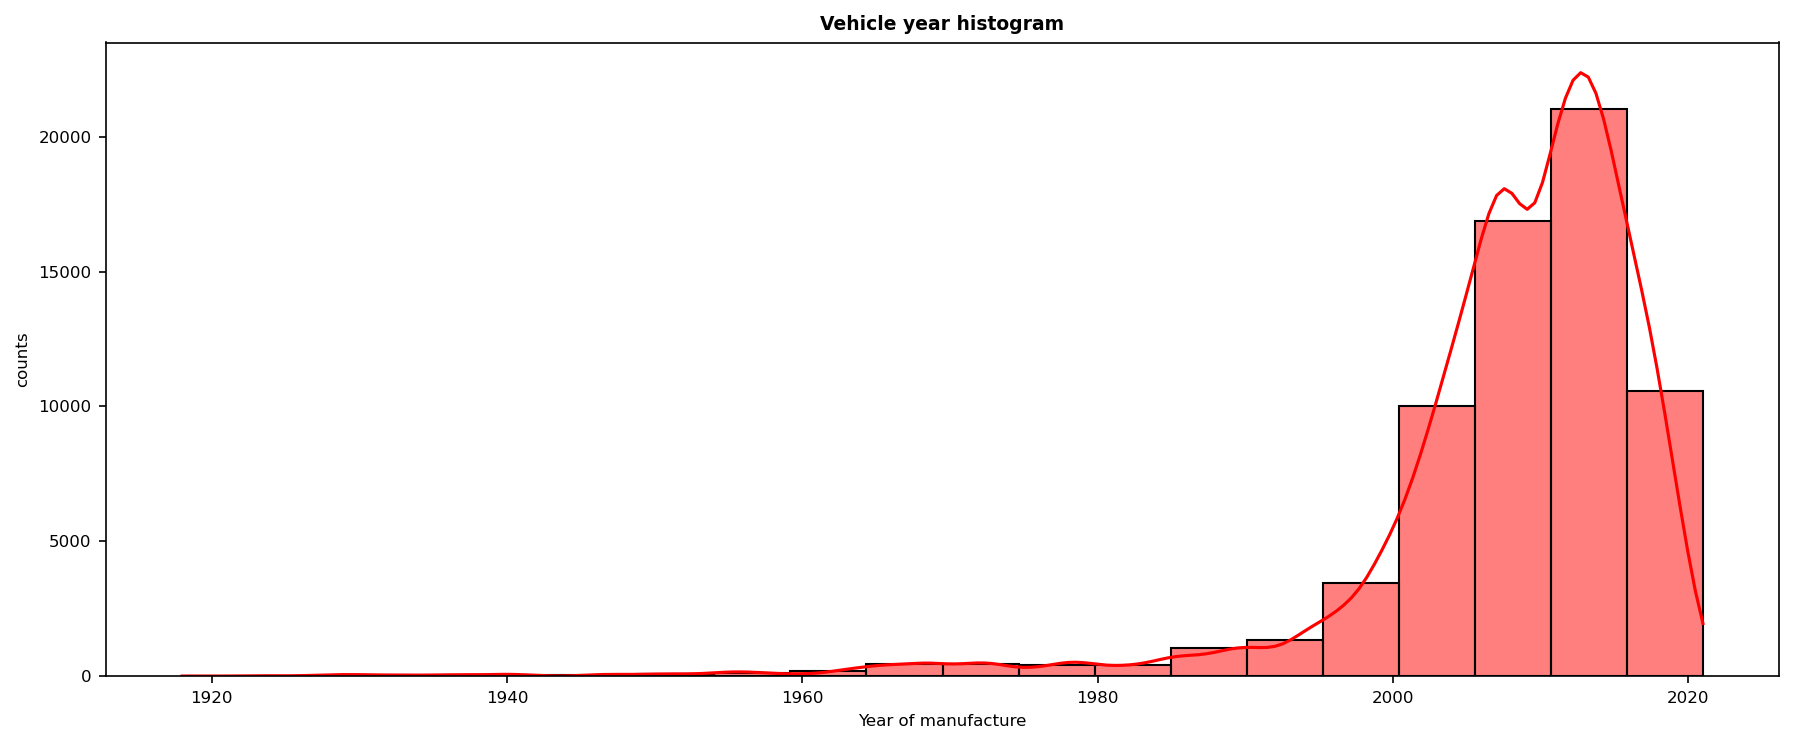

In [60]:
plt.figure(figsize =(12,5))
sns.histplot(data=vehicles_data, x="year", bins=20, kde=True, color='red')
plt.title("Vehicle year histogram",fontsize=9,fontweight ='bold')
plt.xlabel('Year of manufacture')
plt.ylabel('counts')
plt.tight_layout()
plt.show()

In this case, most of the vehicles fall into the utility car range (1998-2021). This is logical because the classic car market is a more exclusive and less demanded market.

In [61]:
print("mean:", round(vehicles_data["year"].mean(),3))
print("median:", round(vehicles_data["year"].median(),3))

mean: 2007.894
median: 2010.0


The mean and median are situated at an expected value, around 10-12 years of age. This indicates that first-hand cars enter the second-hand car market at this stage:

### Price

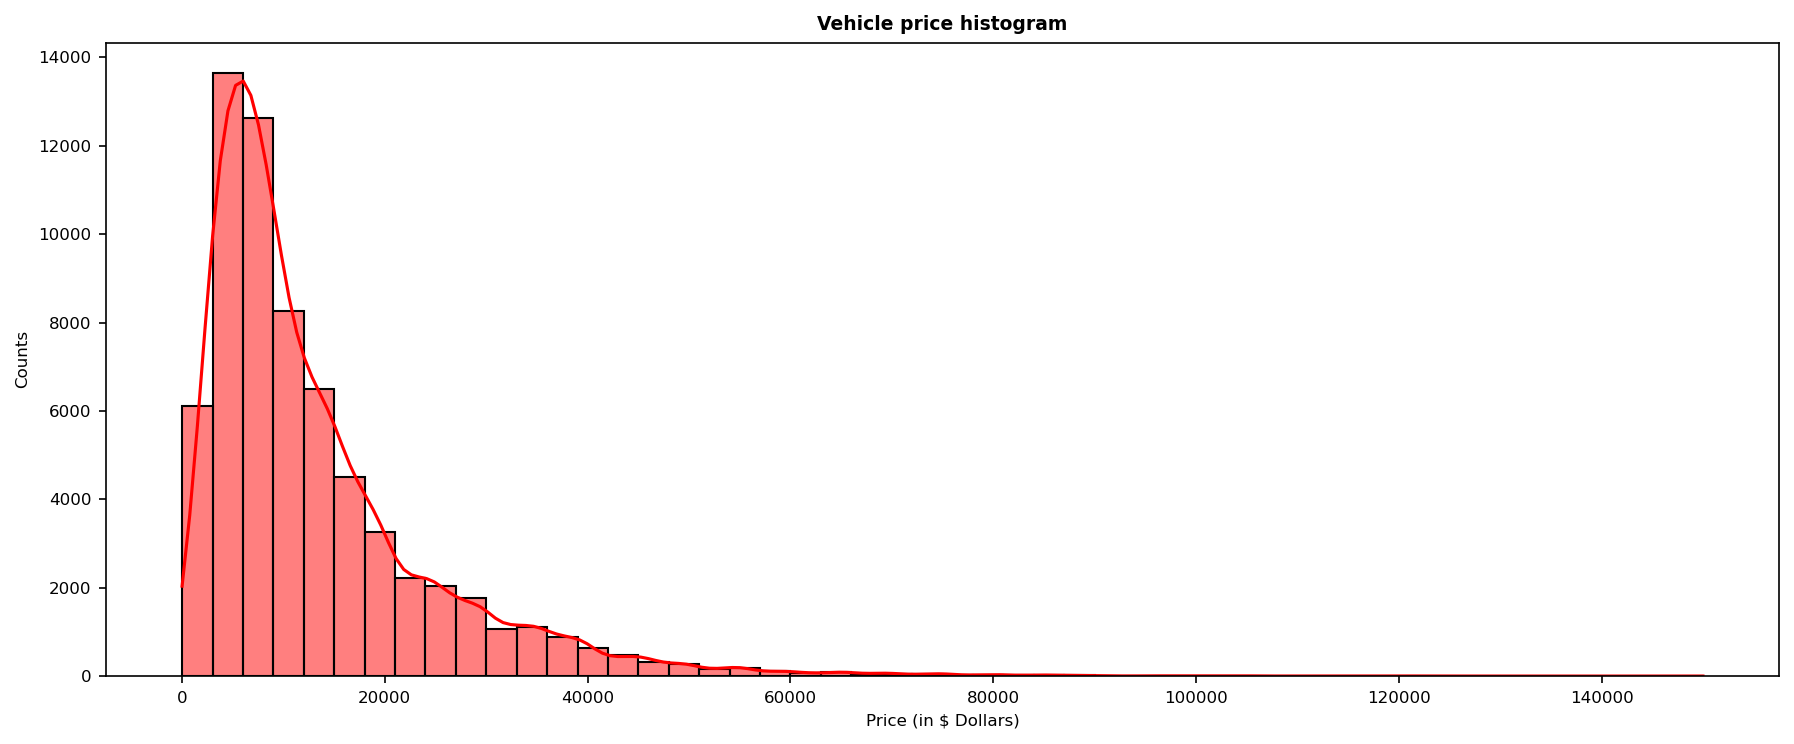

In [62]:
plt.figure(figsize =(12,5))
sns.histplot(data=vehicles_data, x="price", bins=50, kde=True, color='red')
plt.title("Vehicle price histogram",fontsize=9,fontweight ='bold')
plt.xlabel('Price (in $ Dollars)')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

In [63]:
print("mean:", round(vehicles_data["price"].mean(),3))
print("median:", round(vehicles_data["price"].median(),3))

mean: 13302.357
median: 9500.0


In this case, the most common selling price falls between $10,000 and $12,000. These cars likely correspond to the middle category of 10 years and 120,000 miles:

## Conclusion



Throughout this project, three distinct groups of cars have been identified. Therefore, we will make differentiated decisions for each of them.

### Unclean or salvage vehicles

These cars were excluded from the main analysis because, as a company engaged in leasing and car sales, we cannot offer our customers cars that are in such poor condition as to be destined for the scrapyard or cars that do not have a perfect legal history. At the moment, they represent a storage expense with no possibility of deriving any business benefit from them. Therefore, it is recommended to sell them as soon as possible to companies specialized in their treatment.

It would be advisable to delve deeper into our maintenance spare parts costs and assess whether we could use any of the discarded cars as a source of affordable components. For this purpose, an analysis of the average maintenance cost and the cost of spare parts is necessary to determine if the combined costs of these two factors exceed the storage cost of the scrapped car.

### Vehicles pre 1998

In the case of classic vehicles, it has been verified that it is a limited market with high value. In the "year" histogram, we can see that the number of classic cars we own is limited:

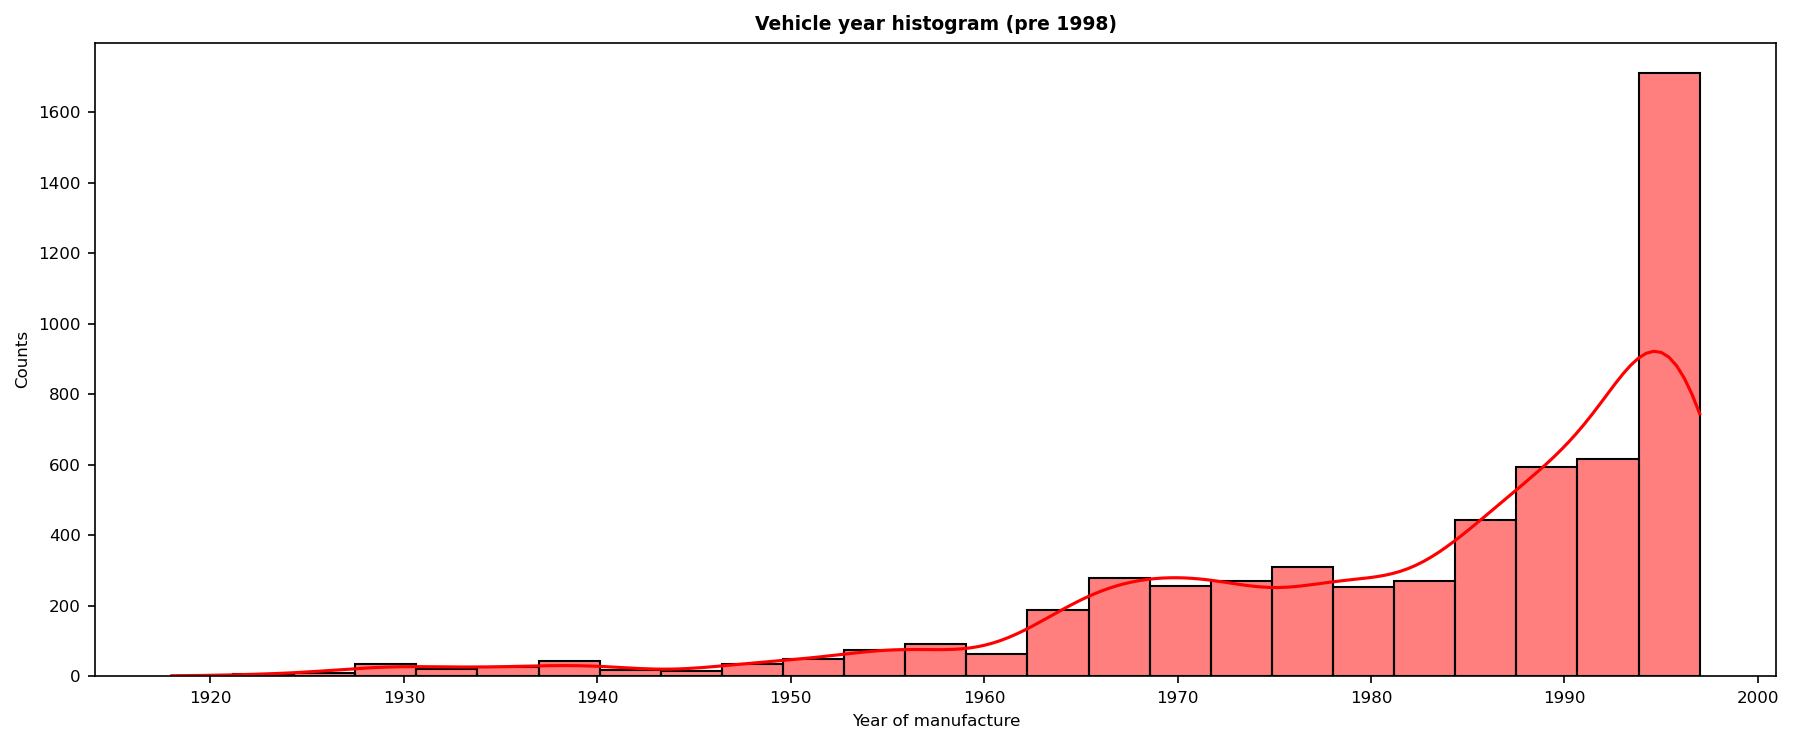

In [64]:
plt.figure(figsize =(12,5))
sns.histplot(data=vehicles_data[vehicles_data["year"] < 1998], x="year", bins=25, kde=True, color='red')
plt.title("Vehicle year histogram (pre 1998)",fontsize=9,fontweight ='bold')
plt.xlabel('Year of manufacture')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

However, for those manufactured before the year 1970, we can see that they have a high market value:

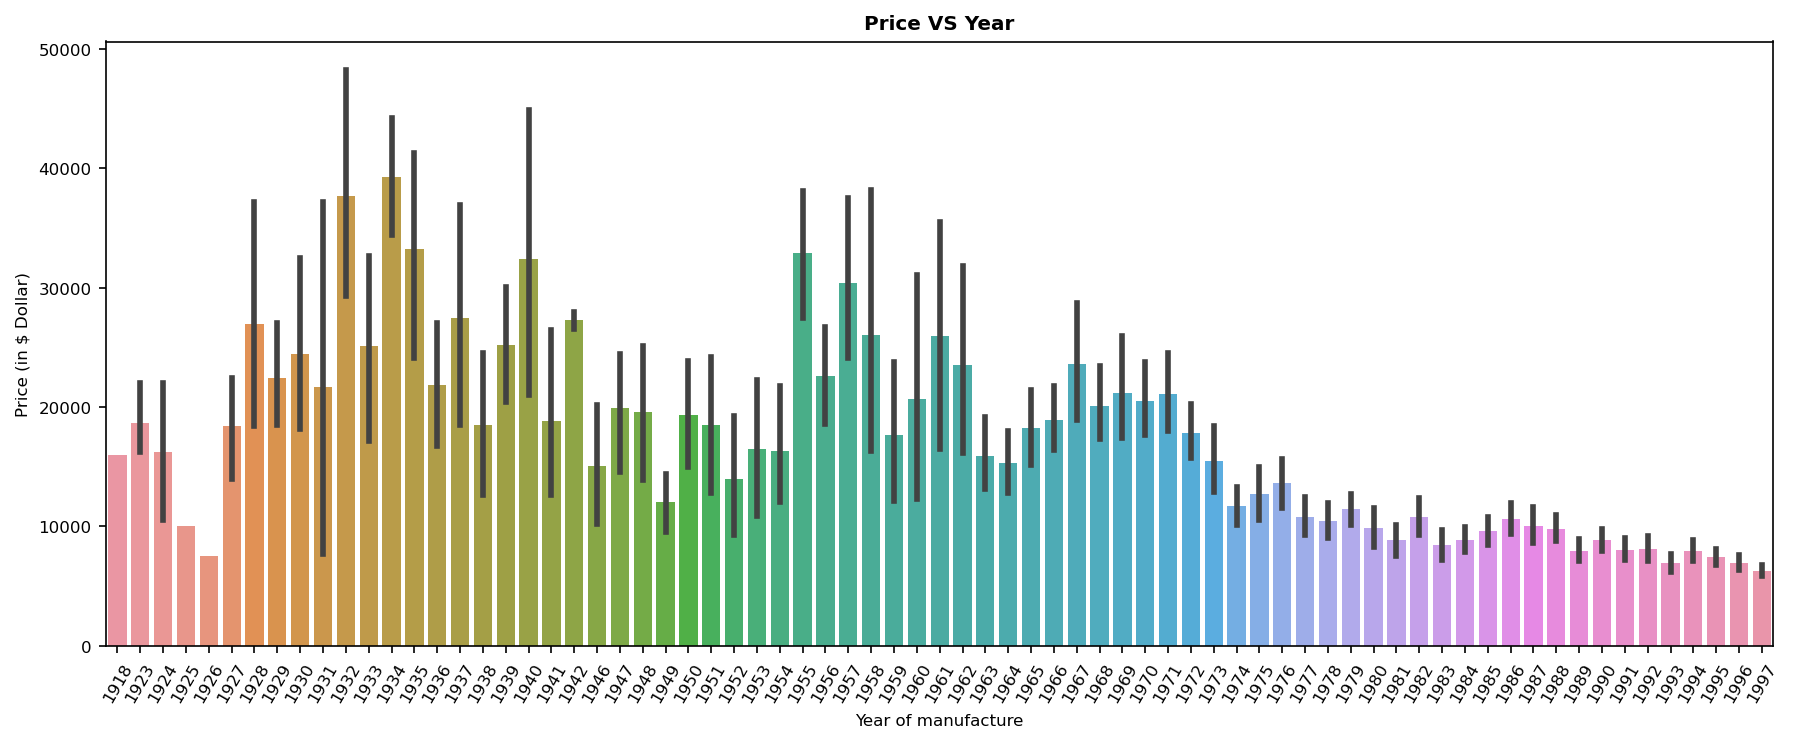

In [65]:
sns.set_palette('summer_r')
plt.figure(figsize =(12,5))
sns.barplot(data=vehicles_data[vehicles_data["year"] < 1998], y='price',x='year')
plt.title("Price VS Year",fontweight ='bold')
plt.xlabel('Year of manufacture')
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollar)')
plt.tight_layout()
plt.show()

As a business strategy, the following recommendations are suggested: establish a division for renting or selling classic cars within our business model. Classic cars present a strong investment opportunity as there are not too many units available, and their prices are relatively high. The cost of storage should be similar to that of other vehicles. However, it is important to consider that maintenance expenses will be higher due to the scarcity of parts, especially the original spare parts that collectors value the most. Within this division, we should target two types of customers: collectors and restorers.

1. Collectors: Collectors are looking for rare, exclusive, high-quality cars with low mileage. In exchange, they are willing to pay substantial amounts of money. 
2. Restorers: Restorers seek cheaper cars in poorer or very poor condition as restoration projects.

It is advisable to conduct an analysis of the rarity of the vehicle (using the quantity of units produced and sold) and track price movements over the past years (our data corresponds to 2021 sales) to identify which brands and models have appreciated in recent years and by how much. For classic cars, there are two types of potential income:
- Active: Rental and sales revenue.
- Passive: Intrinsic appreciation of the classic car over the years.

1. For less sought-after models, those in poorer condition, or with higher odometer readings, it is recommended to sell them to potential restorers interested in restoration projects.

2. For high-value models, more exclusive, rare, and in excellent condition, a dual-income strategy is recommended:
+ active income from rentals and sales
+ passive income from appreciation.

If you wish to avoid extensive use to maintain their passive value, they can also be used as marketing tools by attending classic car conventions and events to promote the company and generate additional income through exhibitions.

As indicated, all of these recommendations are subject to a more in-depth analysis of the classic cars in possession to calculate their intrinsic appreciation accurately.

### Vehicles post 1998

The recommended strategy will be as follows:

Considering the price:

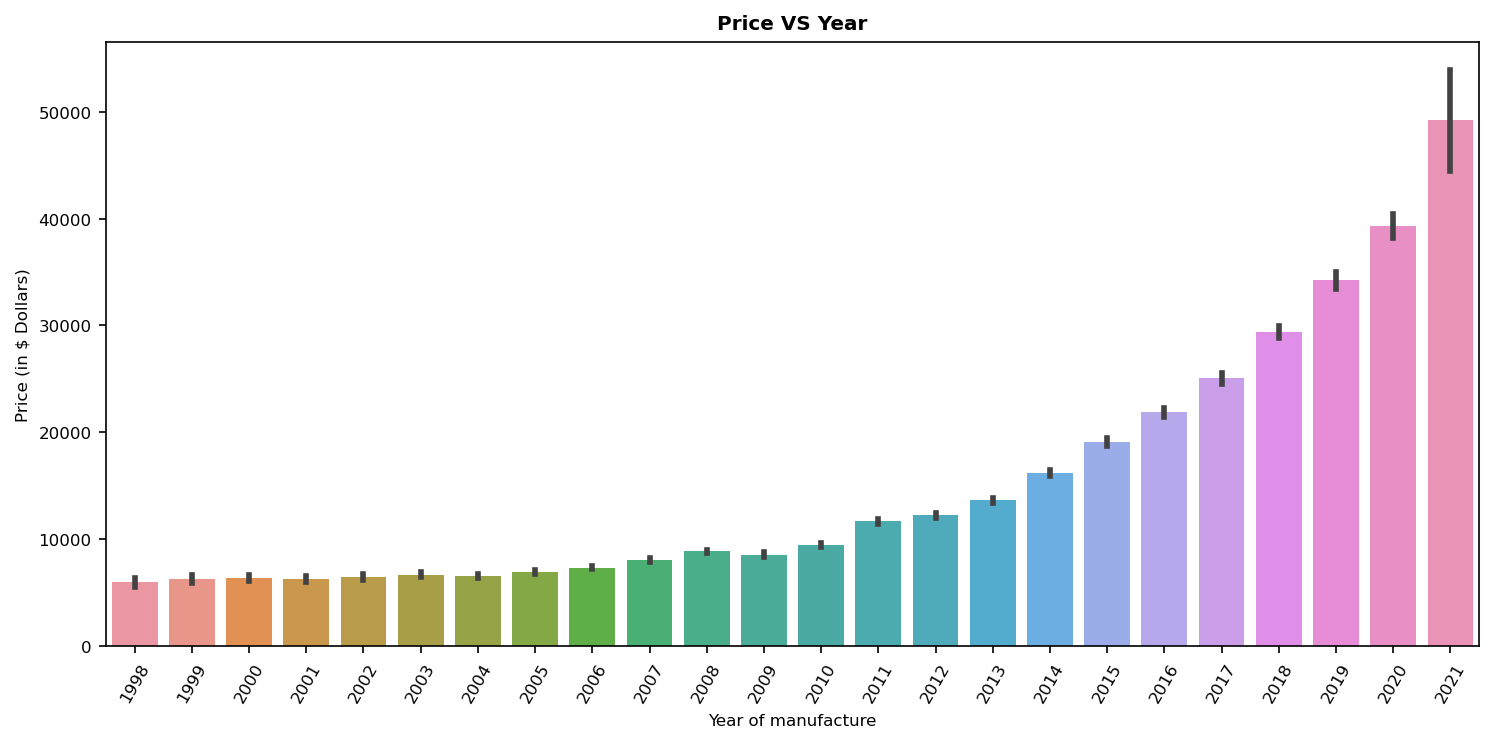

In [66]:
sns.set_palette('summer_r')
plt.figure(figsize =(10,5))
sns.barplot(data=vehicles_data[vehicles_data["year"] >= 1998], y='price',x='year')
plt.title("Price VS Year",fontweight ='bold')
plt.xlabel('Year of manufacture')
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)')
plt.tight_layout()
plt.show()

We can see that the depreciation in value is steep in the first ten years of a car's life. Therefore, the strategy proposed is fixed-rate renting/leasing for these initial ten years. This way, we can use the new car value (which is the highest) to calculate the lease payments for a vehicle that, although depreciating year by year, will not affect the active income from renting/leasing.

Once the cars finish the renting/leasing period, they will be around 10 years old, which, as we have seen, is the typical time for first-hand cars to enter the second-hand market:

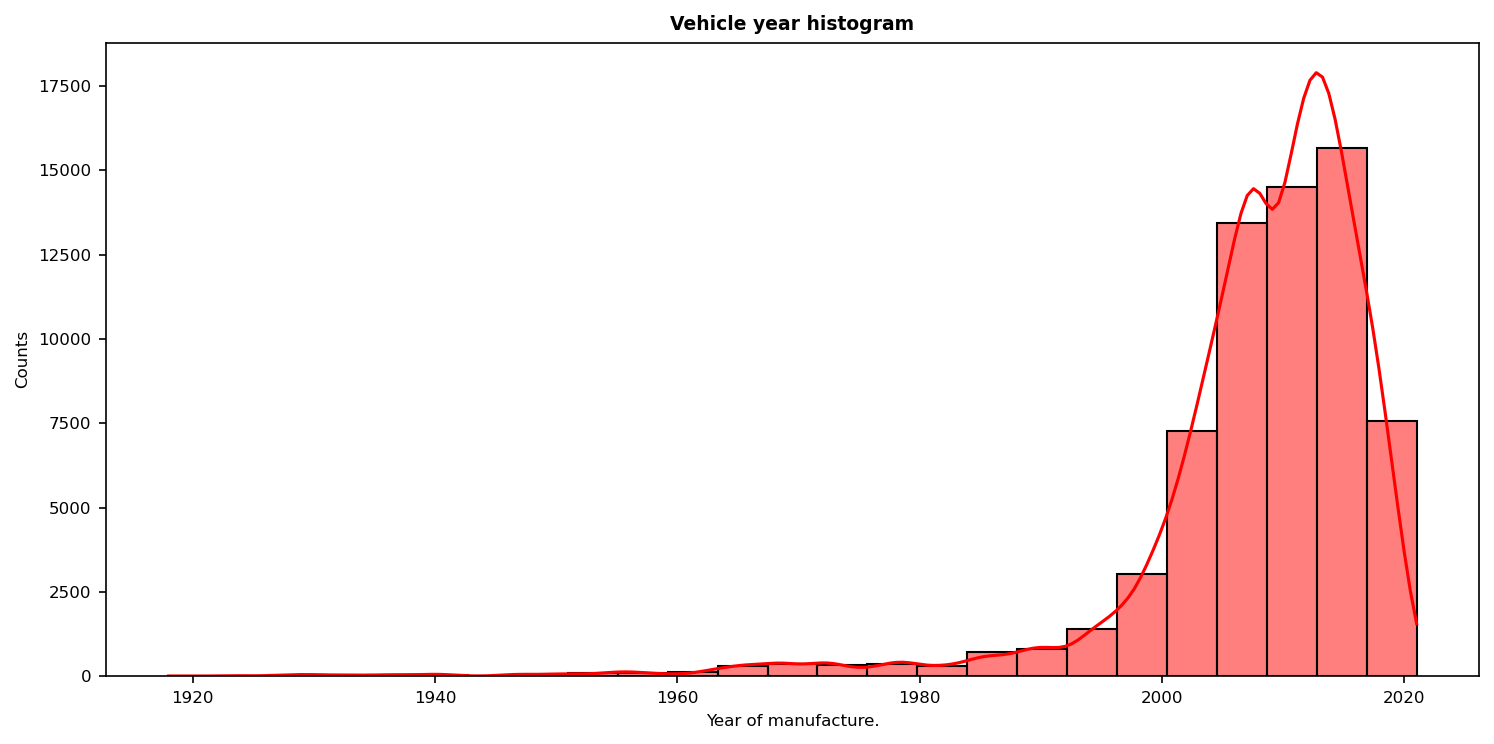

In [67]:
plt.figure(figsize =(10,5))
sns.histplot(data=vehicles_data, x="year", bins=25, kde=True, color='red')
plt.title("Vehicle year histogram",fontsize=9,fontweight ='bold')
plt.xlabel('Year of manufacture.')
plt.ylabel('Counts')
plt.tight_layout()
plt.show()

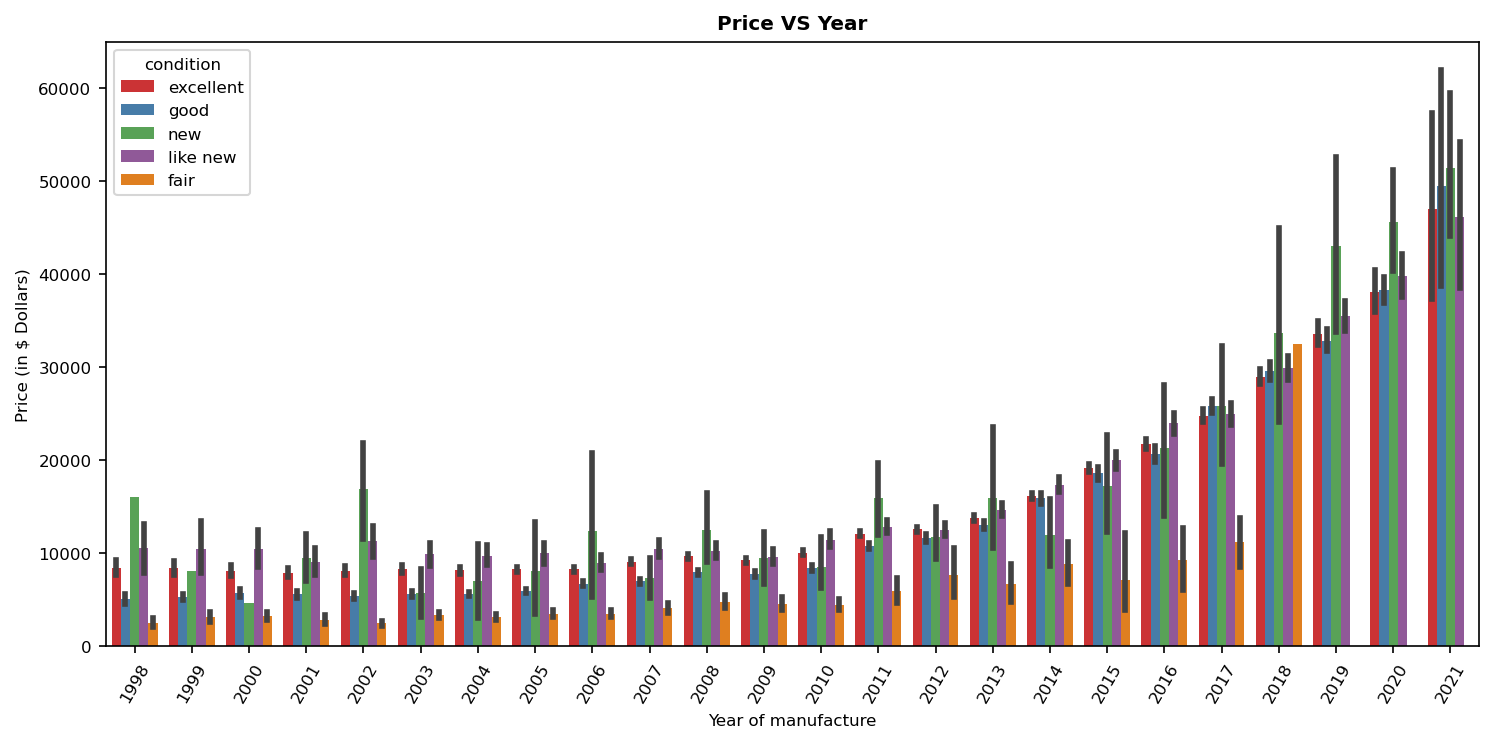

In [68]:
sns.set_palette('Set1')
plt.figure(figsize =(10,5))
sns.barplot(data=vehicles_data[vehicles_data["year"] >= 1998], y='price',x='year', hue="condition")
plt.title("Price VS Year",fontweight ='bold')
plt.xlabel('Year of manufacture')
plt.xticks(rotation=60)
plt.ylabel('Price (in $ Dollars)')
plt.tight_layout()
plt.show()

If we break down by price, we can see that cars in "excellent" condition retain their value much better with over 10 years of age compared to cars in "good" condition.

Therefore, the following business temporal strategy is proposed:

- Fixed-rate leasing for the first 10 years (with a discount bonus for those who return the vehicle in very good condition).
- Affordable leasing or sale of vehicles over 10 years old in excellent condition.
- **Immediate** sale of all cars in "good" condition over 10 years old, as they will require more maintenance and yield less in resale value.

Similarly, we have found that the average breaking point for vehicles is usually around 120,000 miles. Therefore, it is also recommended to immediately sell all vehicles with over 100,000 miles.

Lastly, we must consider potential environmental regulations that are currently in place or may be imposed in the future. Such regulations could significantly impact the resale value of vehicles over a certain age. However, these measures typically do not affect the market for historic or classic cars.